## Install YOLOv8


In [27]:
!pip uninstall ultralytics

^C


**Check Ultralytics YOLOv8, Python, PyTorch, and other resources Version**

In [1]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.74  Python-3.7.0 torch-1.8.0 CUDA:0 (Quadro M2200, 4096MiB)
Setup complete  (8 CPUs, 31.9 GB RAM, 176.5/405.0 GB disk)


## 1. Import Dependencies

In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
from ultralytics import YOLO
from IPython.display import display, Image


## 2. Load Model

In [3]:
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

100%|█████████████████████████████████████████████████████████████████████████████| 6.23M/6.23M [00:04<00:00, 1.63MB/s]


## 3. Make Detections with Images

In [4]:
img ='b3c939e3-61fb6427.jpg'

In [11]:
results = model.predict(source=img, conf=0.4 , show = True )
print(len(results))
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs
cv2.waitKey(50000)
cv2.destroyAllWindows()


image 1/1 I:\Proposel\CV\CUSTOM_VEHICLE_DETECTION\using_yolo\b3c939e3-61fb6427.jpg: 384x640 5 cars, 1 truck, 105.4ms
Speed: 2.0ms preprocess, 105.4ms inference, 15.6ms postprocess per image at shape (1, 3, 640, 640)


1


**Get The BBOXES from results**

In [12]:
bboxes =  results[0].boxes.xyxy.tolist() # you can get any formate  result.boxes.... 'xyxy,xywh,...'
print(bboxes)

[[805.1990966796875, 328.384033203125, 1032.1099853515625, 462.6634521484375], [467.4495849609375, 343.381591796875, 526.3569946289062, 381.6923828125], [1127.35302734375, 386.7113952636719, 1279.4169921875, 625.218994140625], [290.49456787109375, 317.7579650878906, 456.86248779296875, 430.4935607910156], [546.7669067382812, 323.8533935546875, 653.5784301757812, 420.2071533203125], [290.415283203125, 317.9871826171875, 456.85498046875, 430.7884521484375]]


**With Matplotlib**

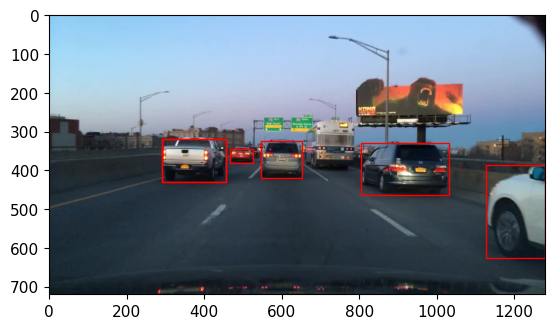

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline 

image = plt.imread(img) 
# Create a figure and axis
fig, ax = plt.subplots()
ax.imshow(image)

# Loop over the bboxes and draw them on the image
for bbox in bboxes:
    x1, y1, x2, y2 = bbox
    rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

# Show the image with bboxes
plt.show()

**With Open CV**

In [8]:
# Load the image
image = cv2.imread(img)  
# Convert the image tensor to a numpy array
image = np.array(image)

# Loop over the bboxes and draw them on the image
for bbox in bboxes:
    x1, y1, x2, y2 = bbox
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)  # convert bbox coordinates to integers
    image = cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0,255), 1)  # draw bbox on the image

# Display the image with bboxes
cv2.imshow('Image with Bboxes', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 4. Real Time Detections

In [9]:
cap = cv2.VideoCapture('video11.mp4')
screen_width = 640
screen_height = 480
while cap.isOpened():
    ret, frame = cap.read()
    frame = cv2.resize(frame, (screen_width, screen_height))
    
    # Make detections 
    results = model.predict(source=frame, conf=0.25,show = True) # You can disable show = False
    bboxes =  results[0].boxes.xyxy.tolist() # you can get any formate  result.boxes.... 'xyxy,xywh,...'
    # Loop over the bboxes and draw them on the image
    for bbox in bboxes:
        x1, y1, x2, y2 = bbox
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)  # convert bbox coordinates to integers
        frame = cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0,255), 1)  # draw bbox on the image
        cv2.imshow('YOLO', frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


0: 480x640 6 cars, 146.5ms
Speed: 9.5ms preprocess, 146.5ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 7 cars, 29.4ms
Speed: 1.0ms preprocess, 29.4ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 6 cars, 28.9ms
Speed: 12.9ms preprocess, 28.9ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 6 cars, 29.7ms
Speed: 0.0ms preprocess, 29.7ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 6 cars, 38.4ms
Speed: 0.0ms preprocess, 38.4ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 6 cars, 1 bench, 38.3ms
Speed: 0.0ms preprocess, 38.3ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 6 cars, 38.7ms
Speed: 0.0ms preprocess, 38.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 7 cars, 33.9ms
Speed: 0.0ms preprocess, 33.9ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 6


0: 480x640 3 cars, 31.3ms
Speed: 0.0ms preprocess, 31.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 4 cars, 31.0ms
Speed: 0.0ms preprocess, 31.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 5 cars, 14.9ms
Speed: 0.0ms preprocess, 14.9ms inference, 15.7ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 3 cars, 23.5ms
Speed: 0.0ms preprocess, 23.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 3 cars, 22.6ms
Speed: 1.0ms preprocess, 22.6ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 3 cars, 22.5ms
Speed: 1.0ms preprocess, 22.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 3 cars, 17.3ms
Speed: 0.0ms preprocess, 17.3ms inference, 14.6ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 4 cars, 22.7ms
Speed: 10.7ms preprocess, 22.7ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

0: 4

## 5. Train from scratch

### Custom Training


**Option 1: (recommended)**

In [12]:
model = YOLO('yolov8n.pt') # pass any model type
model.train(epochs=5,data= 'datasets\\dataset.yaml',imgsz=320,batch=16)  

Ultralytics YOLOv8.0.74  Python-3.7.0 torch-1.8.0 CUDA:0 (Quadro M2200, 4096MiB)
yolo\engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=datasets\dataset.yaml, epochs=5, patience=50, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=Fal

                 truck       1000        392      0.451      0.173       0.18      0.119
Speed: 0.1ms preprocess, 2.7ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs\detect\train9


**Option 2 : CLI**

In [ ]:
# !yolo task=detect mode=train model=yolov8n.pt data= datasets/data.yaml epochs=5 imgsz=320 plots=True batch=16 workers 2


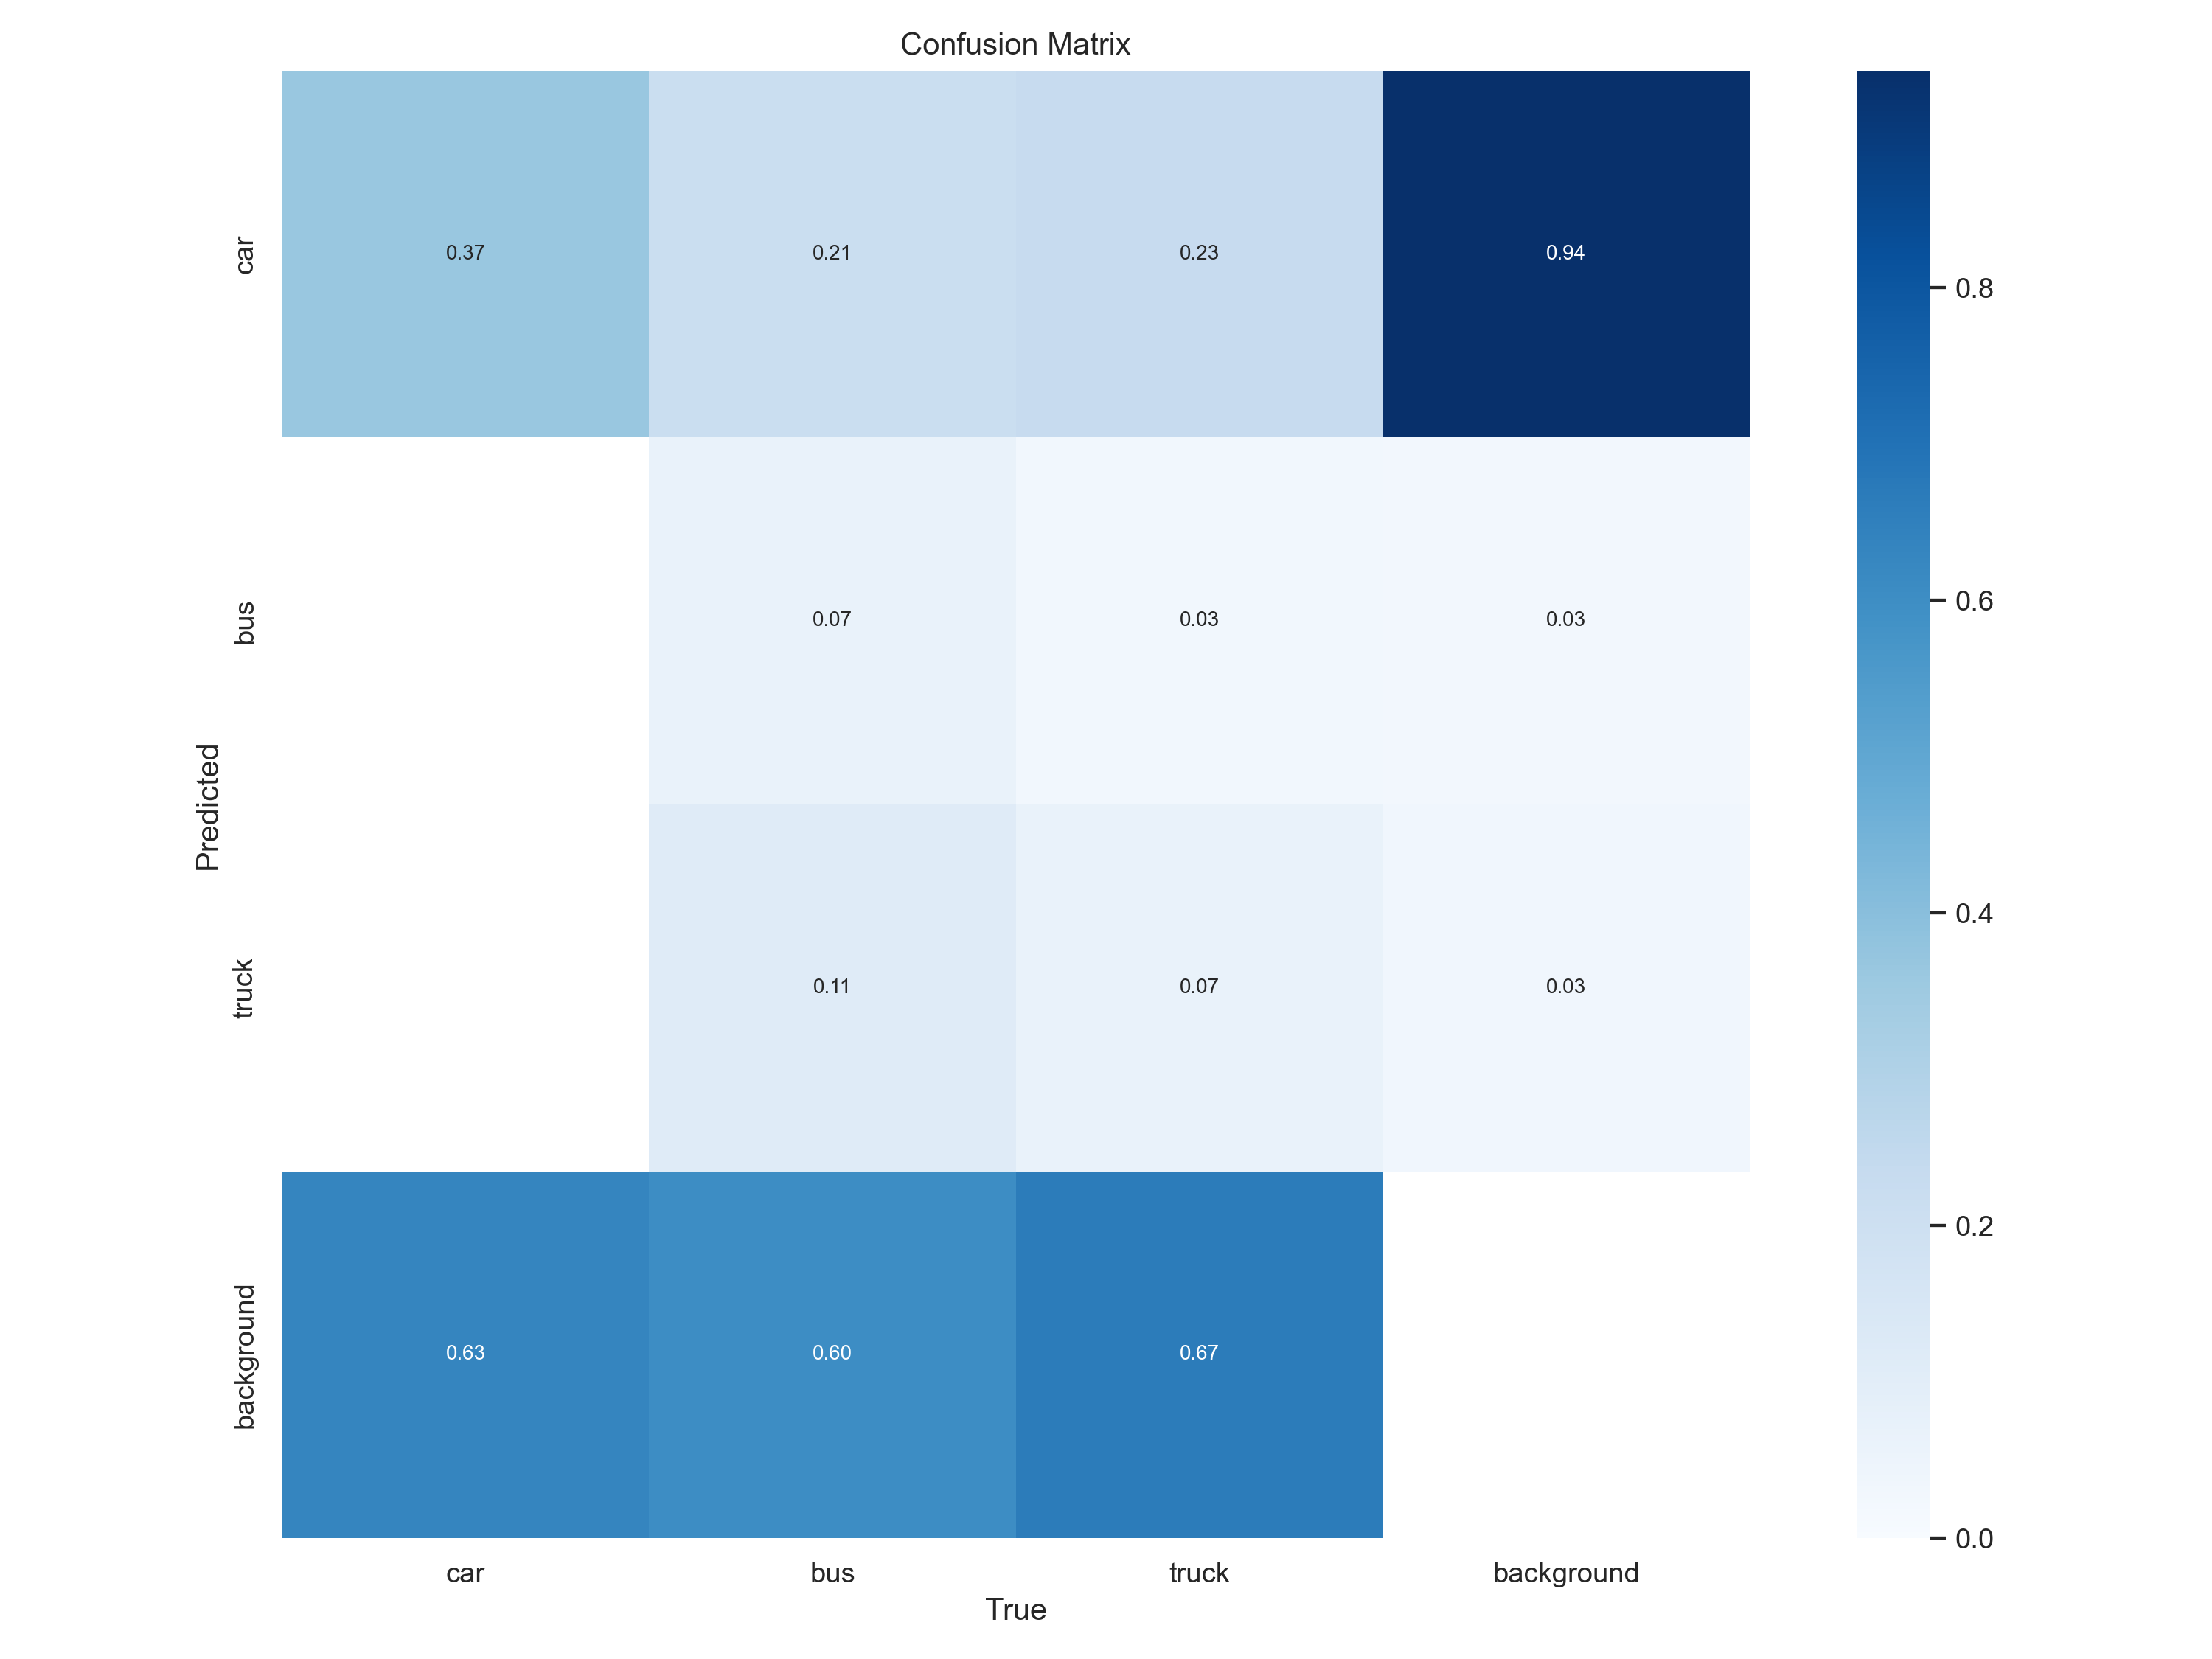

In [14]:
Image(filename='runs/detect/train9/confusion_matrix.png', width=600)

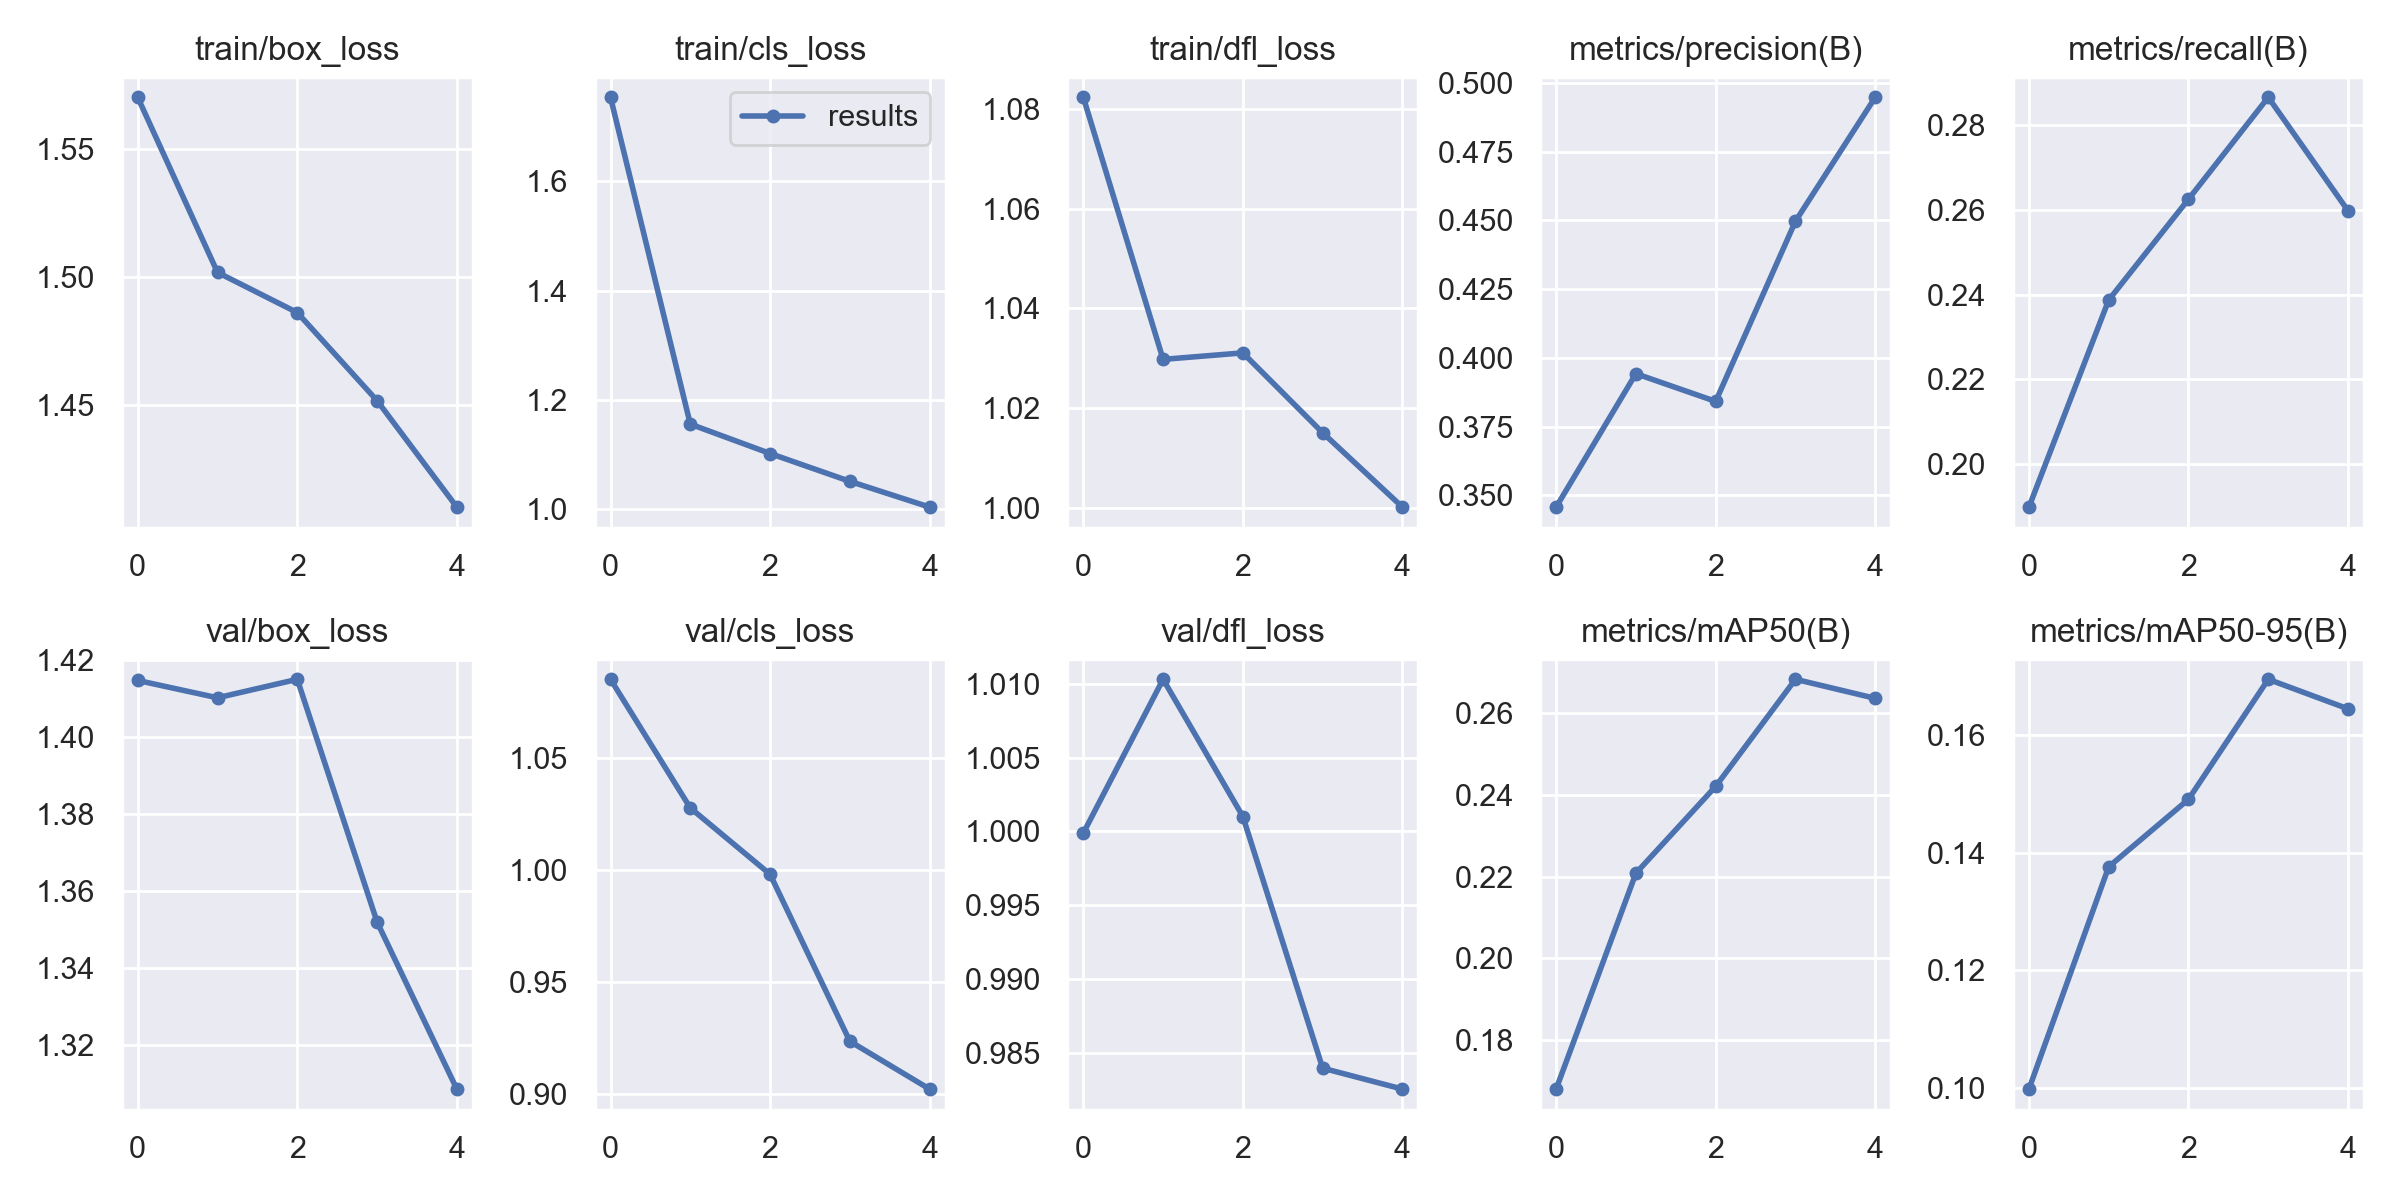

In [15]:
Image(filename='runs/detect/train9/results.png', width=600)

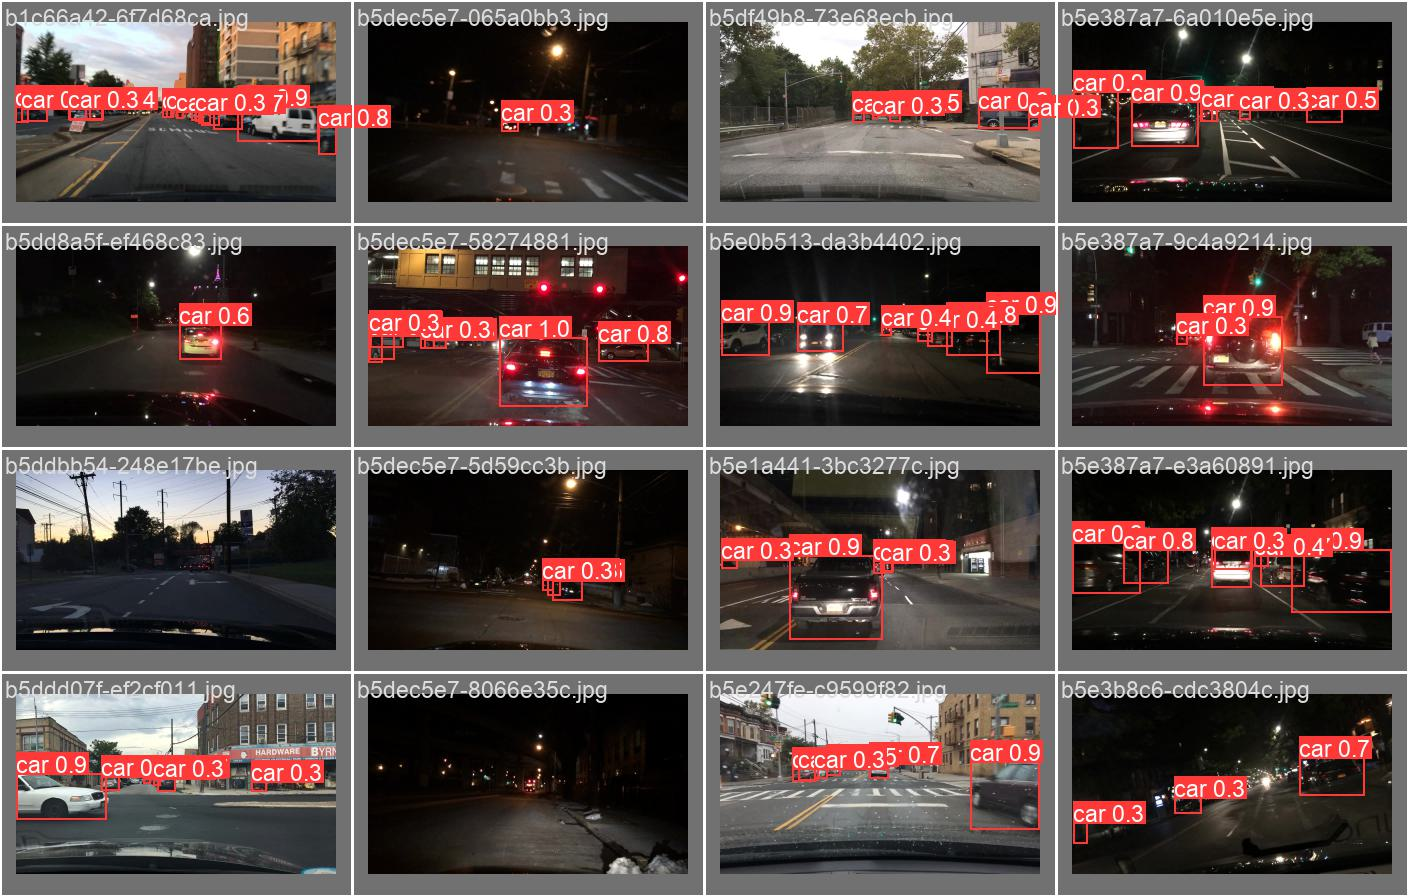

In [16]:
Image(filename='runs/detect/train9/val_batch0_pred.jpg', width=600)

### Validate Custom Model


By default, While we train our model it validates itself using the VAL dataset as there is a default parameter called 'val=True', so there is no need to revalidate it again

**Option 1: (recommended)**

In [18]:
# Load a model
model = YOLO('runs/detect/train9/weights/best.pt')  # load a custom model

# Validate the model
metrics = model.val()  
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.74  Python-3.7.0 torch-1.8.0 CUDA:0 (Quadro M2200, 4096MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning I:\Proposel\CV\CUSTOM_VEHICLE_DETECTION\using_yolo\YOLOv8\datasets\datasets\val\labels.cache... 1000 imag
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:14
                   all       1000      10692       0.45      0.287      0.268      0.169
                   car       1000      10151      0.543      0.424      0.425      0.243
                   bus       1000        149      0.351      0.262        0.2      0.147
                 truck       1000        392      0.455      0.173       0.18      0.118
Speed: 0.1ms preprocess, 3.6ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs\detect\val


array([    0.24304,     0.14689,     0.11841])

**Option 2 : CLI** 

In [20]:
# !yolo task=detect mode=val model=runs/detect/train2/weights/best.pt data= datasets/data.yaml


## 6. Load Custom Model and Make Detections with Images, and Videos

In [17]:
# Load Model
model = YOLO("runs/detect/train9/weights/best.pt")

In [18]:
img ='b3c939e3-61fb6427.jpg'

In [19]:
results = model.predict(source=img, conf=0.5 , show = True)
cv2.waitKey(50000)
cv2.destroyAllWindows()


image 1/1 I:\Proposel\CV\CUSTOM_VEHICLE_DETECTION\using_yolo\b3c939e3-61fb6427.jpg: 192x320 6 cars, 15.6ms
Speed: 0.0ms preprocess, 15.6ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 320)


In [20]:
#Get The BBOXES from results
bboxes =  results[0].boxes.xyxy.tolist() # you can get any formate  result.boxes.... 'xyxy,xywh,...'
print(bboxes)

[[291.7354736328125, 316.46673583984375, 459.7440185546875, 432.67449951171875], [805.6368408203125, 331.0543212890625, 1032.9127197265625, 464.55865478515625], [1125.233642578125, 365.083251953125, 1279.014892578125, 630.2391357421875], [545.8802490234375, 322.3106689453125, 656.2972412109375, 423.4154052734375], [675.65478515625, 332.39080810546875, 775.825439453125, 401.69146728515625], [468.337158203125, 339.1298828125, 534.6731567382812, 381.5062255859375]]


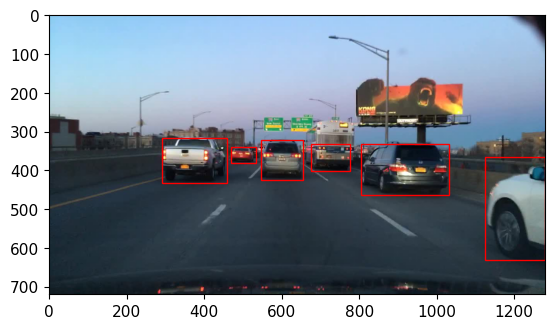

In [21]:
# With Matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline 

image = plt.imread(img) 
# Create a figure and axis
fig, ax = plt.subplots()
ax.imshow(image)

# Loop over the bboxes and draw them on the image
for bbox in bboxes:
    x1, y1, x2, y2 = bbox
    rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

# Show the image with bboxes
plt.show()

In [22]:
# With Open CV
# Load the image
image = cv2.imread(img)  
# Convert the image tensor to a numpy array
image = np.array(image)

# Loop over the bboxes and draw them on the image
for bbox in bboxes:
    x1, y1, x2, y2 = bbox
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)  # convert bbox coordinates to integers
    image = cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0,255), 1)  # draw bbox on the image

# Display the image with bboxes
cv2.imshow('Image with Bboxes', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
cap = cv2.VideoCapture('video11.mp4')
screen_width = 640
screen_height = 480
while cap.isOpened():
    ret, frame = cap.read()
    frame = cv2.resize(frame, (screen_width, screen_height))
    
    # Make detections 
    results = model.predict(source=frame, conf=0.5,show = True) # You can disable show = False
    bboxes =  results[0].boxes.xyxy.tolist() # you can get any formate  result.boxes.... 'xyxy,xywh,...'
    # Loop over the bboxes and draw them on the image
    for bbox in bboxes:
        x1, y1, x2, y2 = bbox
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)  # convert bbox coordinates to integers
        frame = cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0,255), 1)  # draw bbox on the image
        cv2.imshow('YOLO', frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


0: 256x320 3 cars, 58.1ms
Speed: 1.0ms preprocess, 58.1ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 320)

0: 256x320 3 cars, 61.3ms
Speed: 1.0ms preprocess, 61.3ms inference, 4.0ms postprocess per image at shape (1, 3, 320, 320)

0: 256x320 4 cars, 63.0ms
Speed: 0.0ms preprocess, 63.0ms inference, 1.1ms postprocess per image at shape (1, 3, 320, 320)

0: 256x320 3 cars, 56.9ms
Speed: 0.0ms preprocess, 56.9ms inference, 3.0ms postprocess per image at shape (1, 3, 320, 320)

0: 256x320 3 cars, 56.3ms
Speed: 0.0ms preprocess, 56.3ms inference, 3.0ms postprocess per image at shape (1, 3, 320, 320)

0: 256x320 3 cars, 17.3ms
Speed: 0.0ms preprocess, 17.3ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 320)

0: 256x320 3 cars, 15.8ms
Speed: 0.0ms preprocess, 15.8ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 320)

0: 256x320 2 cars, 16.6ms
Speed: 0.0ms preprocess, 16.6ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 320)

0: 256x

Speed: 0.0ms preprocess, 14.2ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 320)

0: 256x320 3 cars, 14.6ms
Speed: 0.0ms preprocess, 14.6ms inference, 14.9ms postprocess per image at shape (1, 3, 320, 320)

0: 256x320 3 cars, 17.1ms
Speed: 0.0ms preprocess, 17.1ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 320)

0: 256x320 3 cars, 16.8ms
Speed: 0.0ms preprocess, 16.8ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 320)

0: 256x320 3 cars, 17.3ms
Speed: 0.0ms preprocess, 17.3ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 320)

0: 256x320 3 cars, 17.3ms
Speed: 0.0ms preprocess, 17.3ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 320)

0: 256x320 4 cars, 19.4ms
Speed: 0.0ms preprocess, 19.4ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 320)

0: 256x320 4 cars, 17.0ms
Speed: 0.0ms preprocess, 17.0ms inference, 13.1ms postprocess per image at shape (1, 3, 320, 320)

0: 256x320 4 cars, 15.9ms
Speed:

## Results

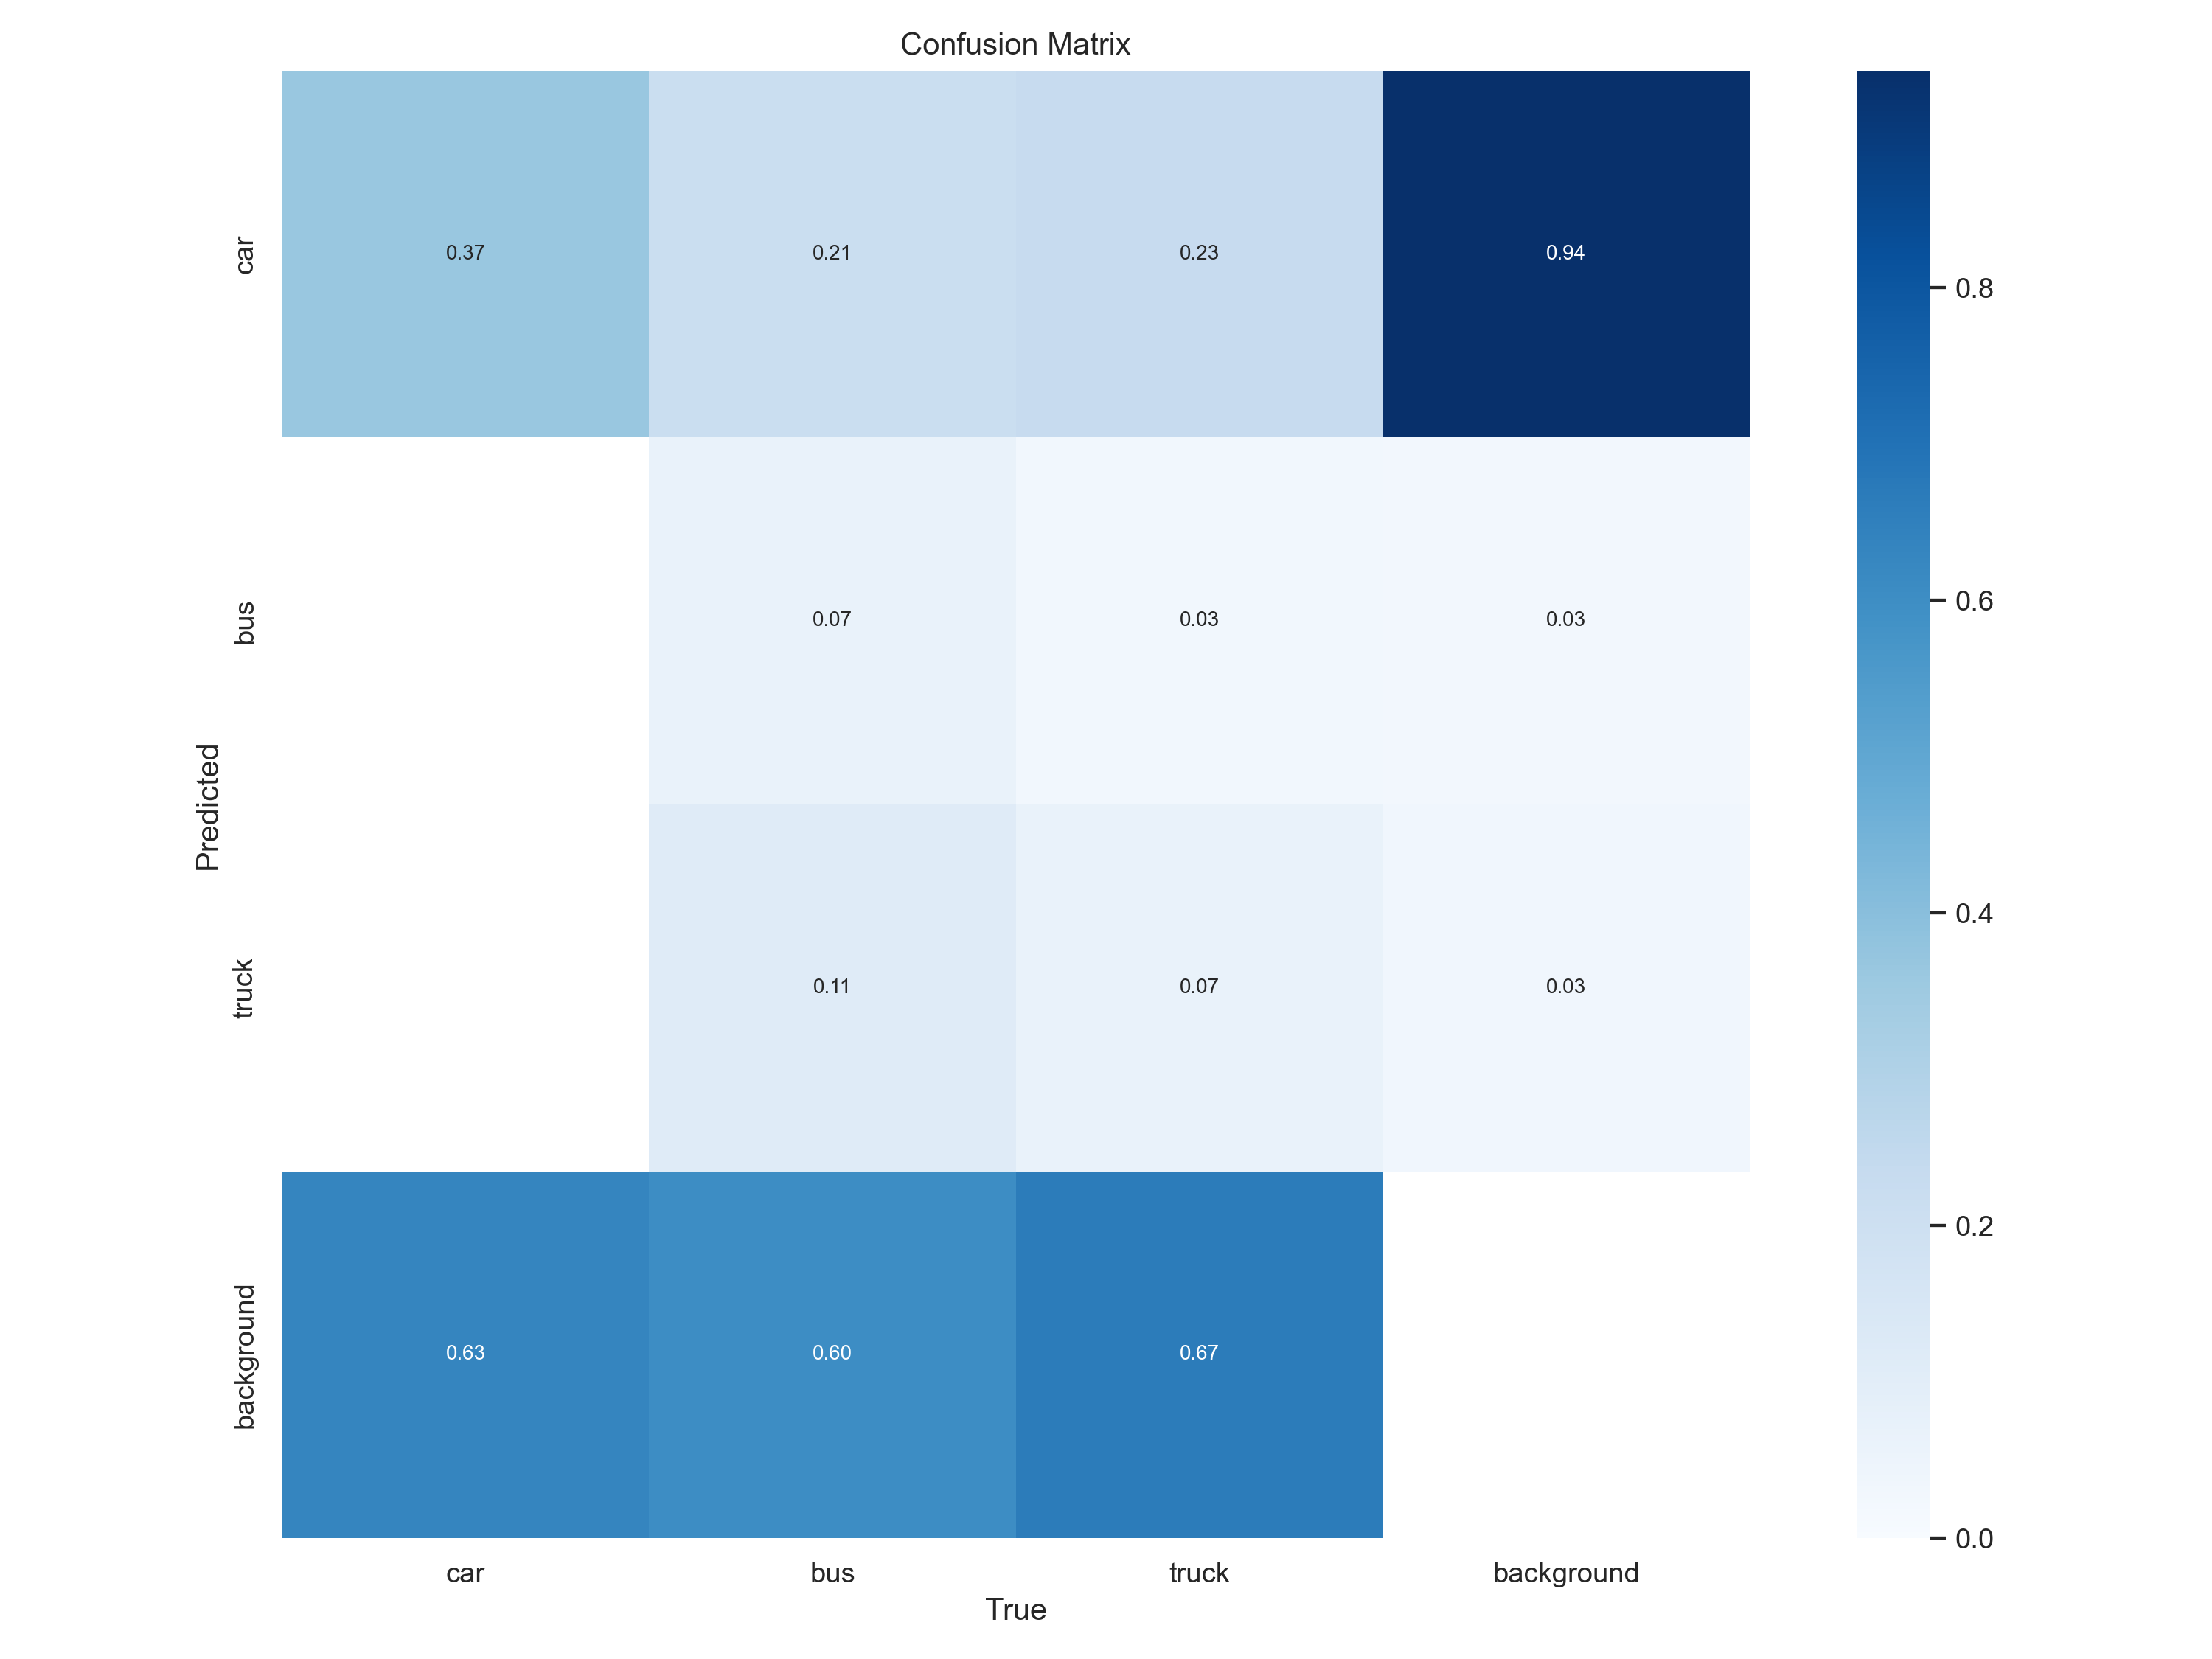

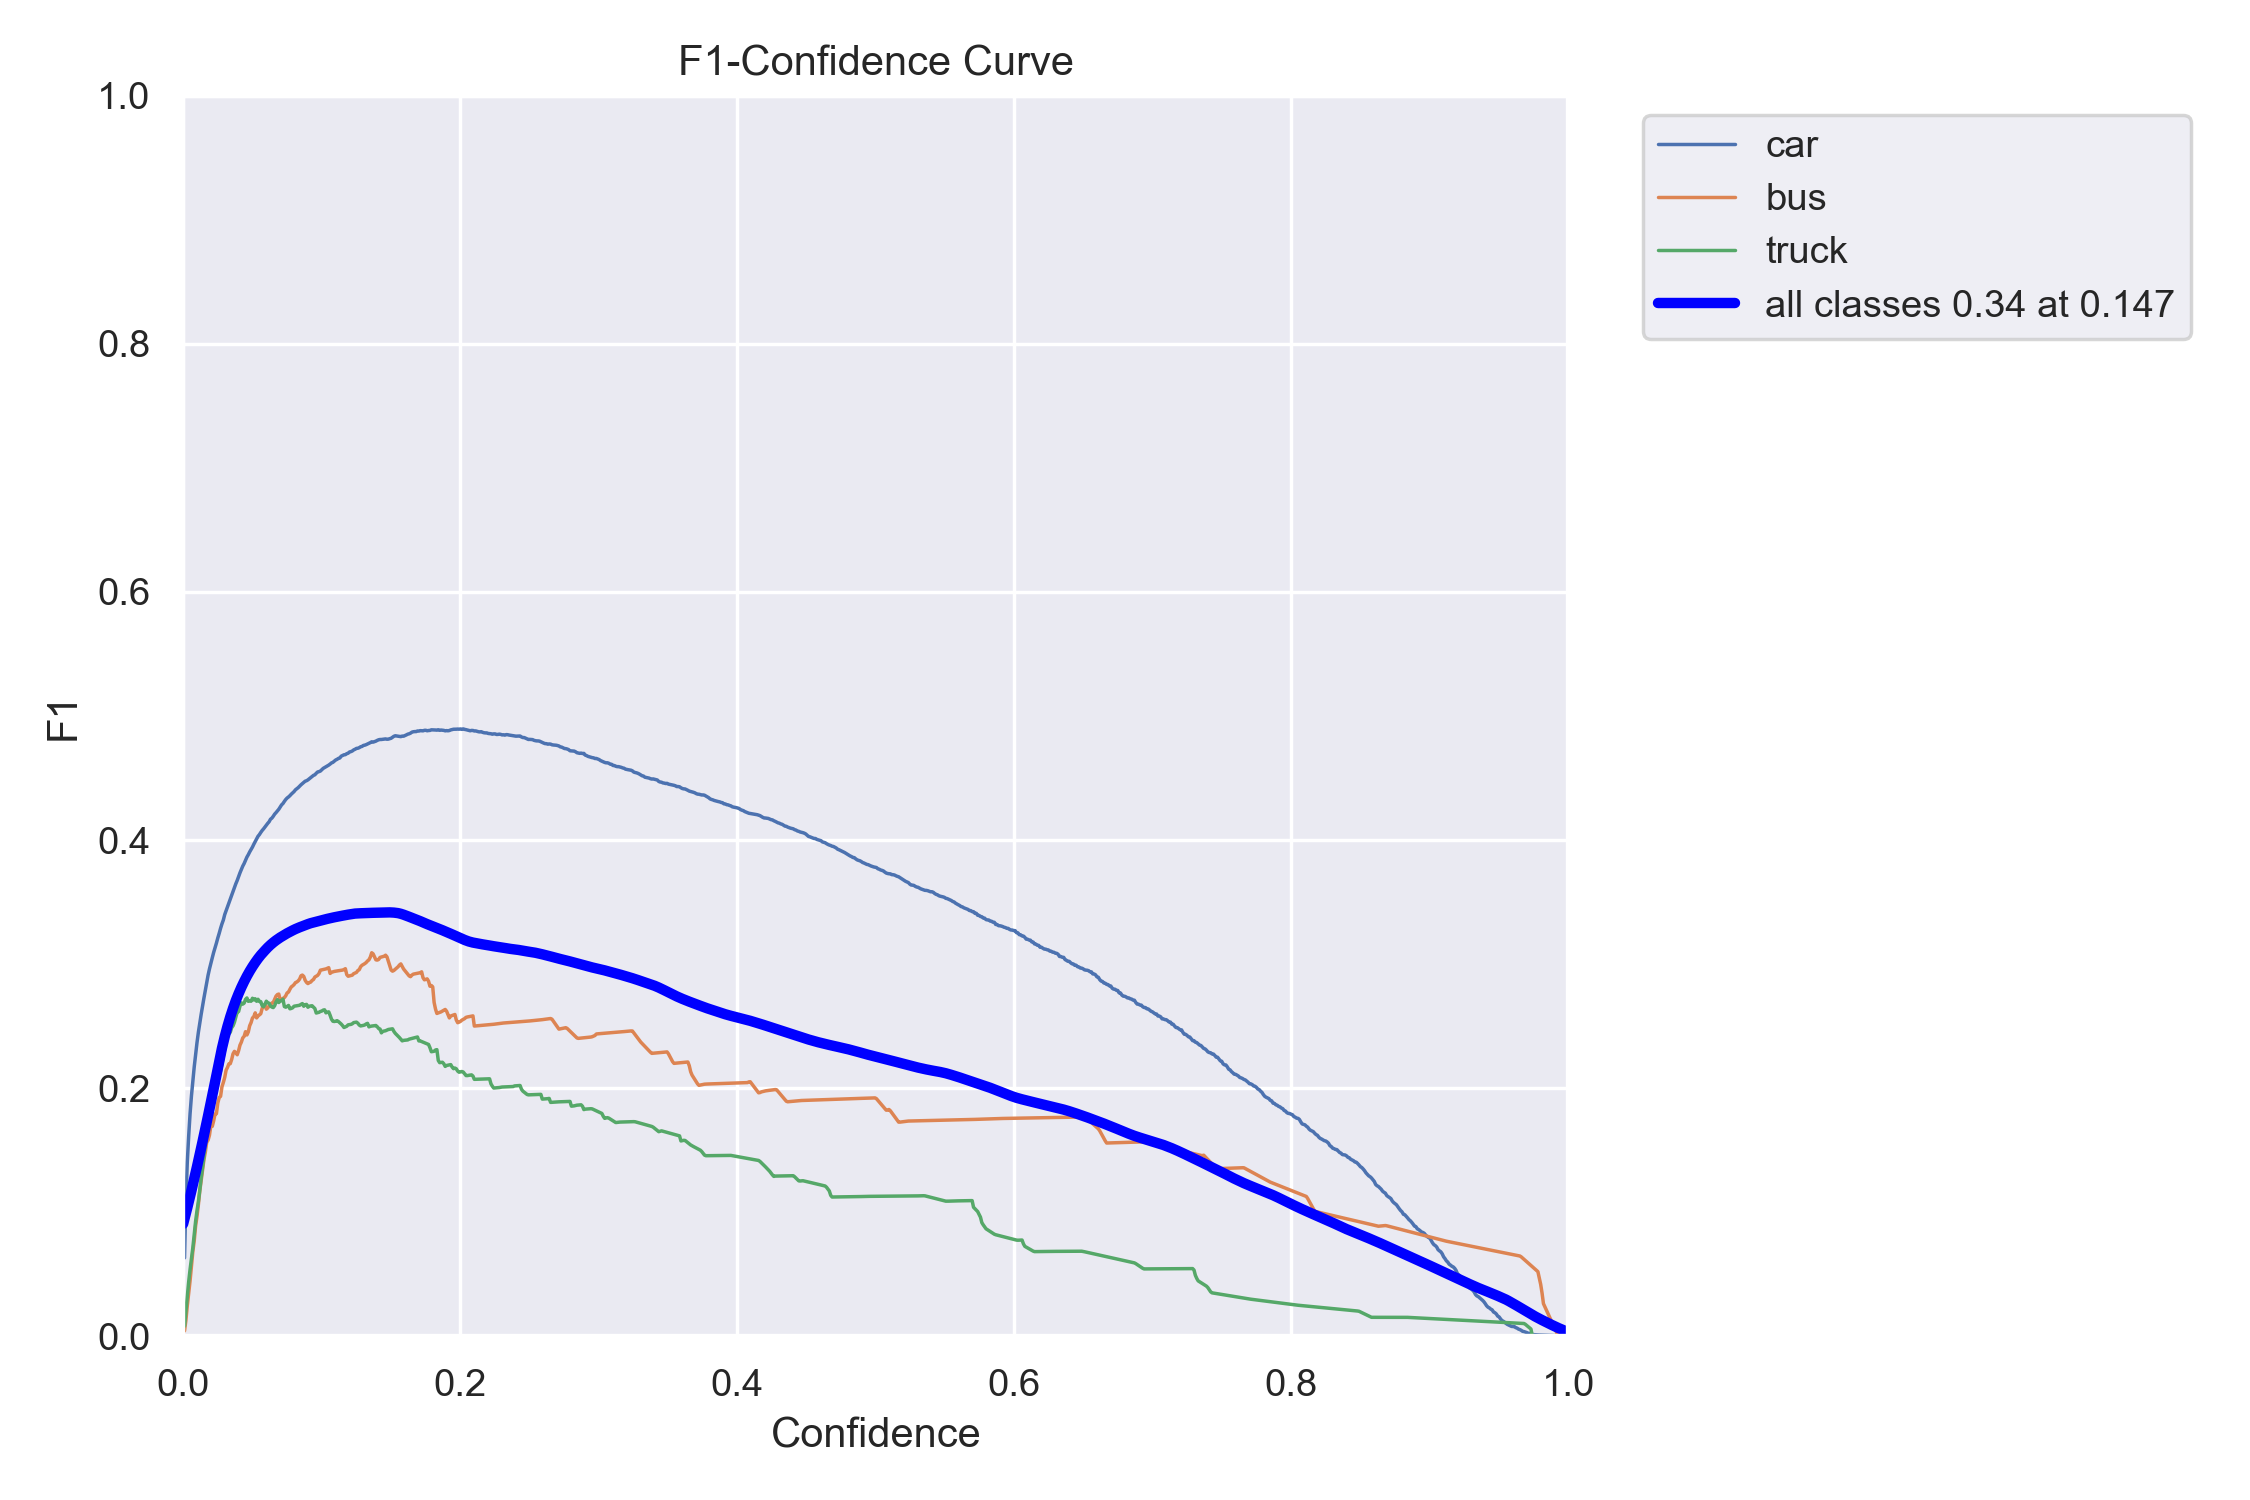

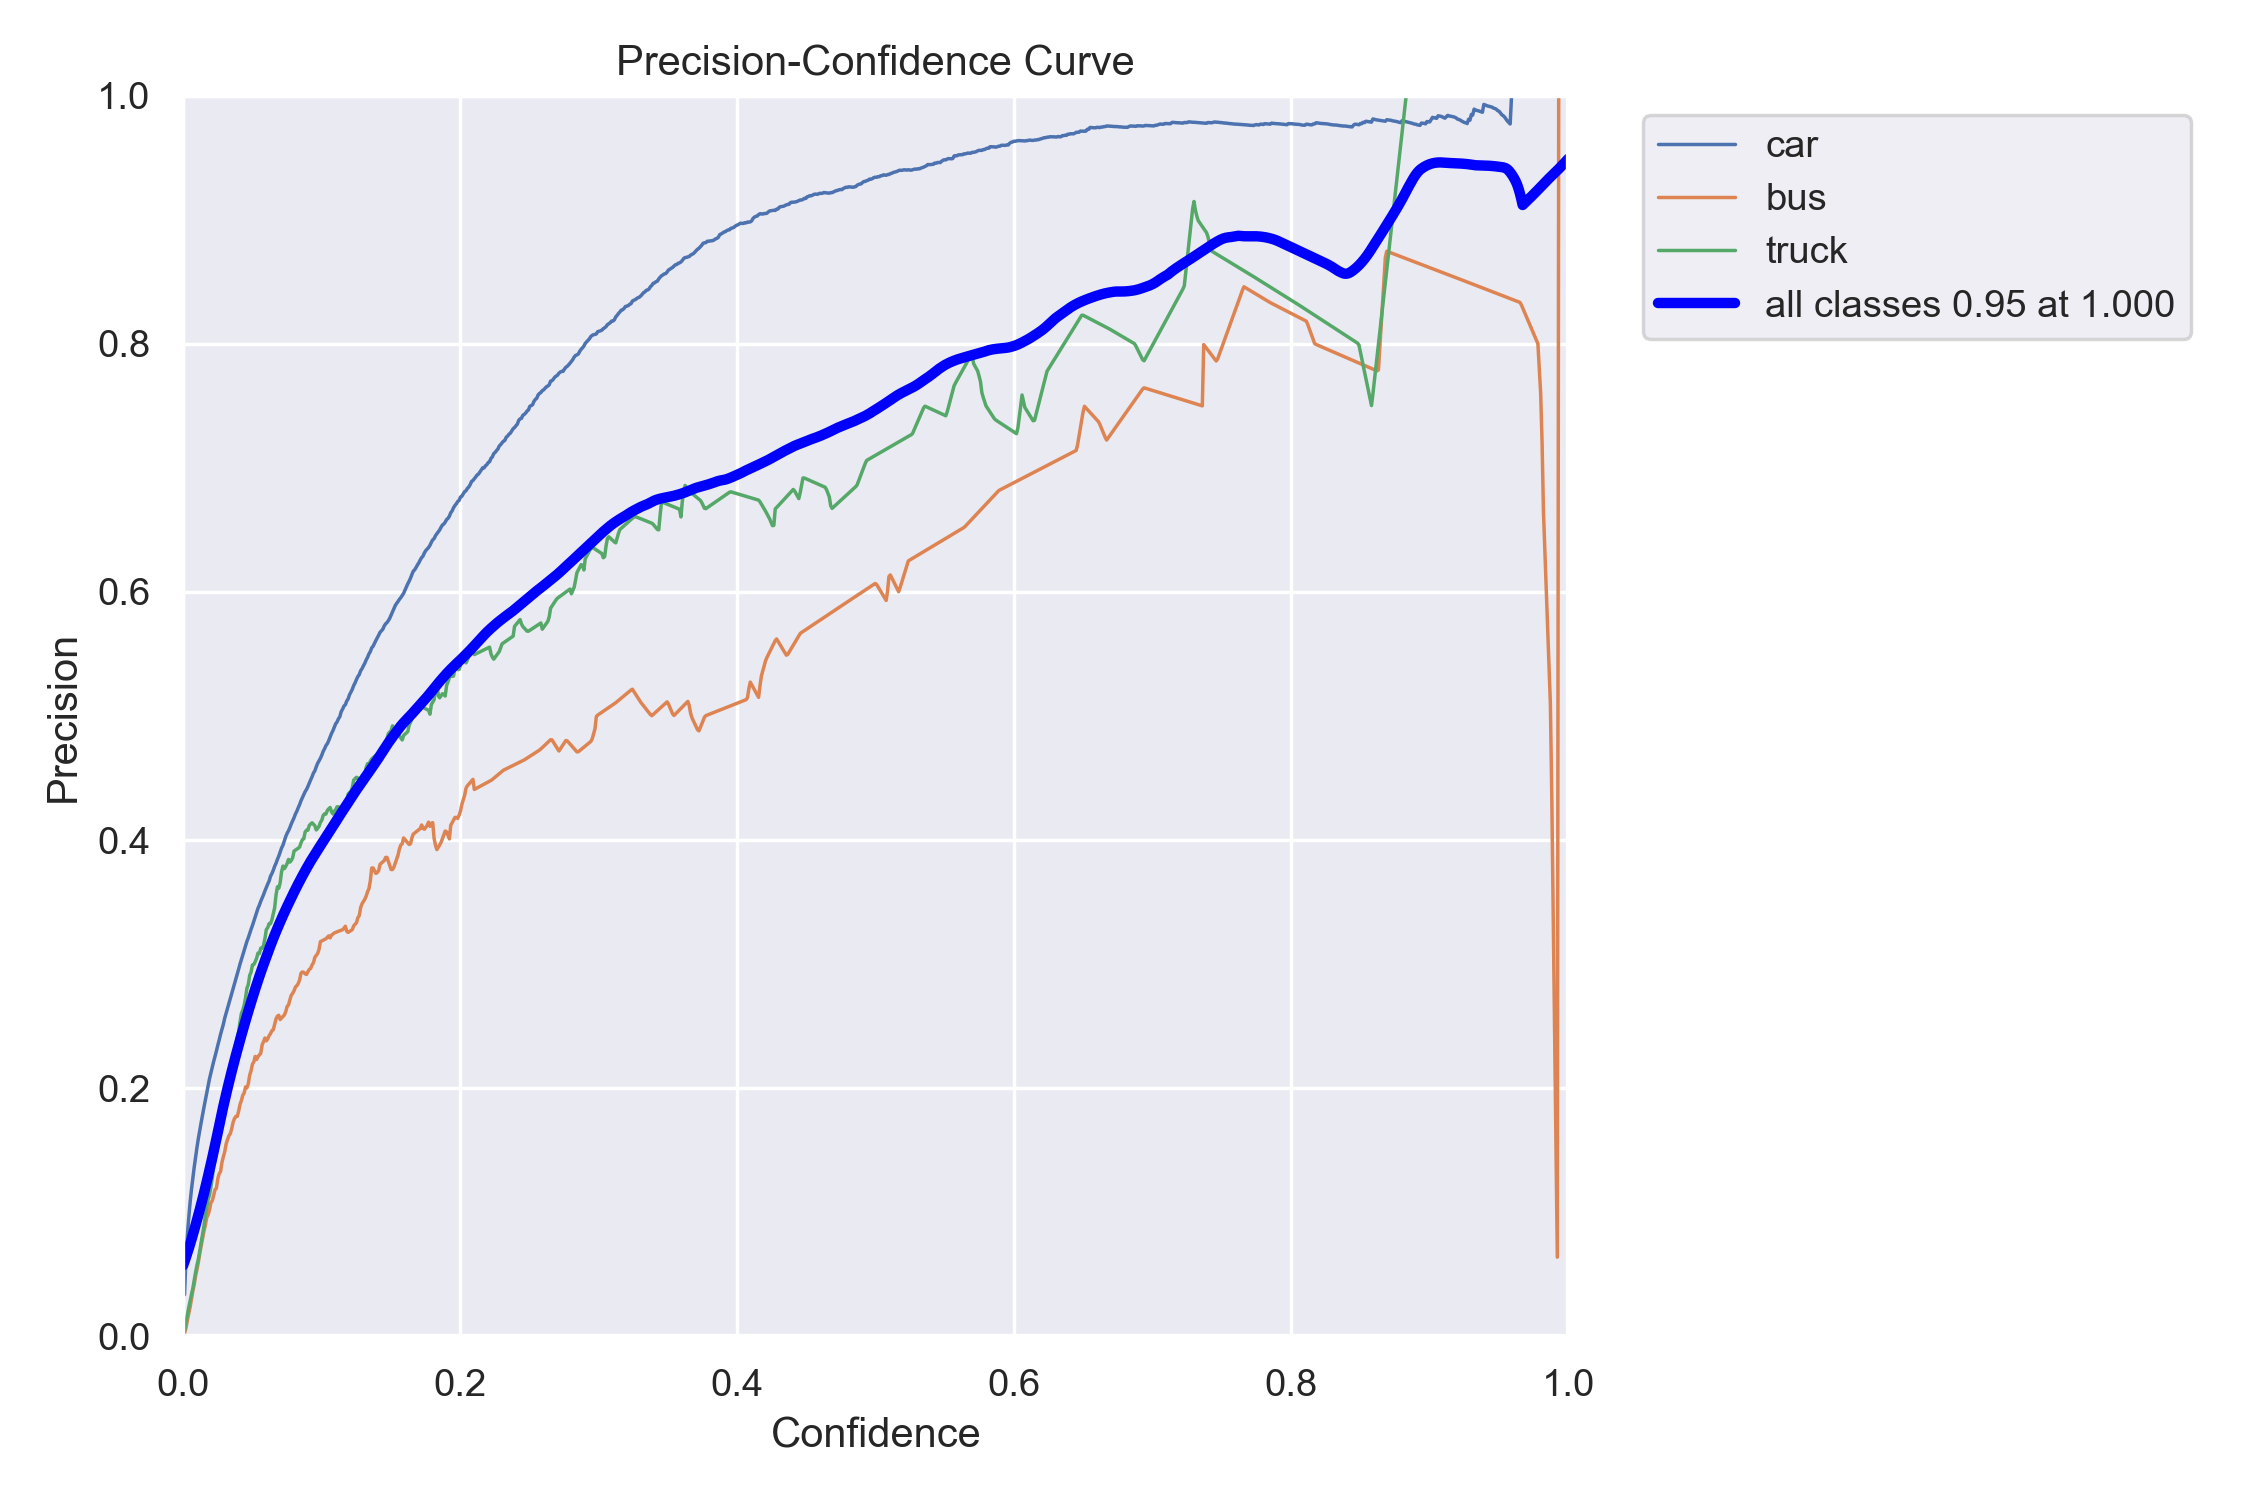

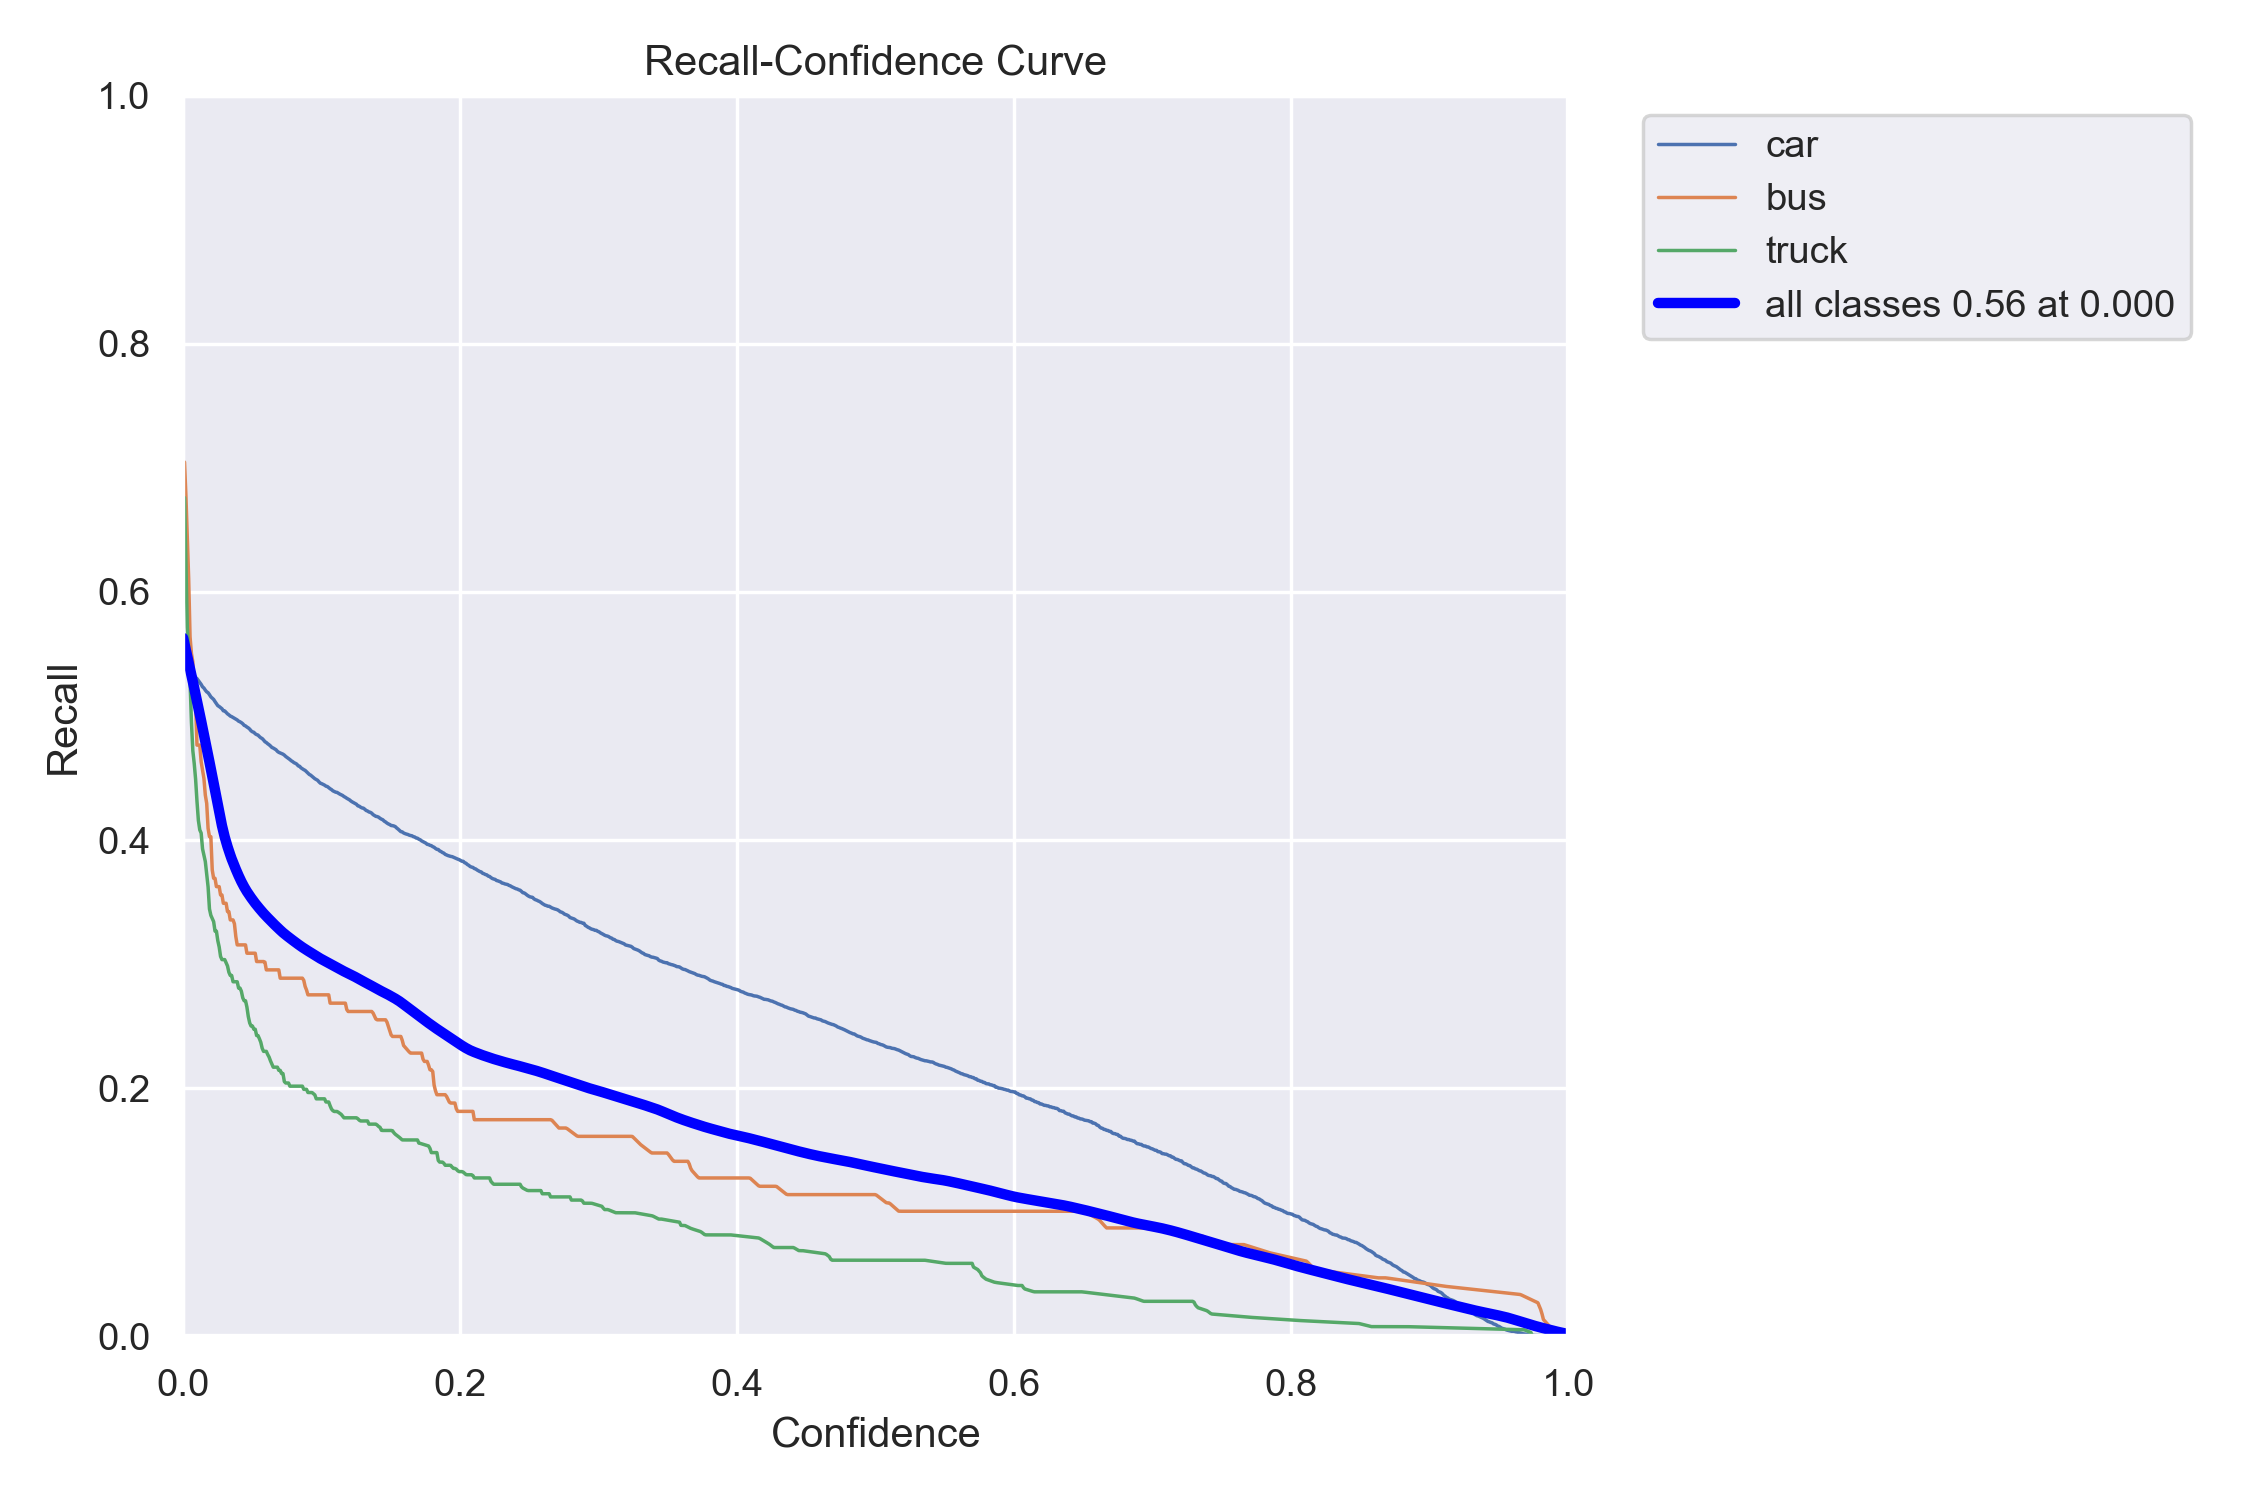
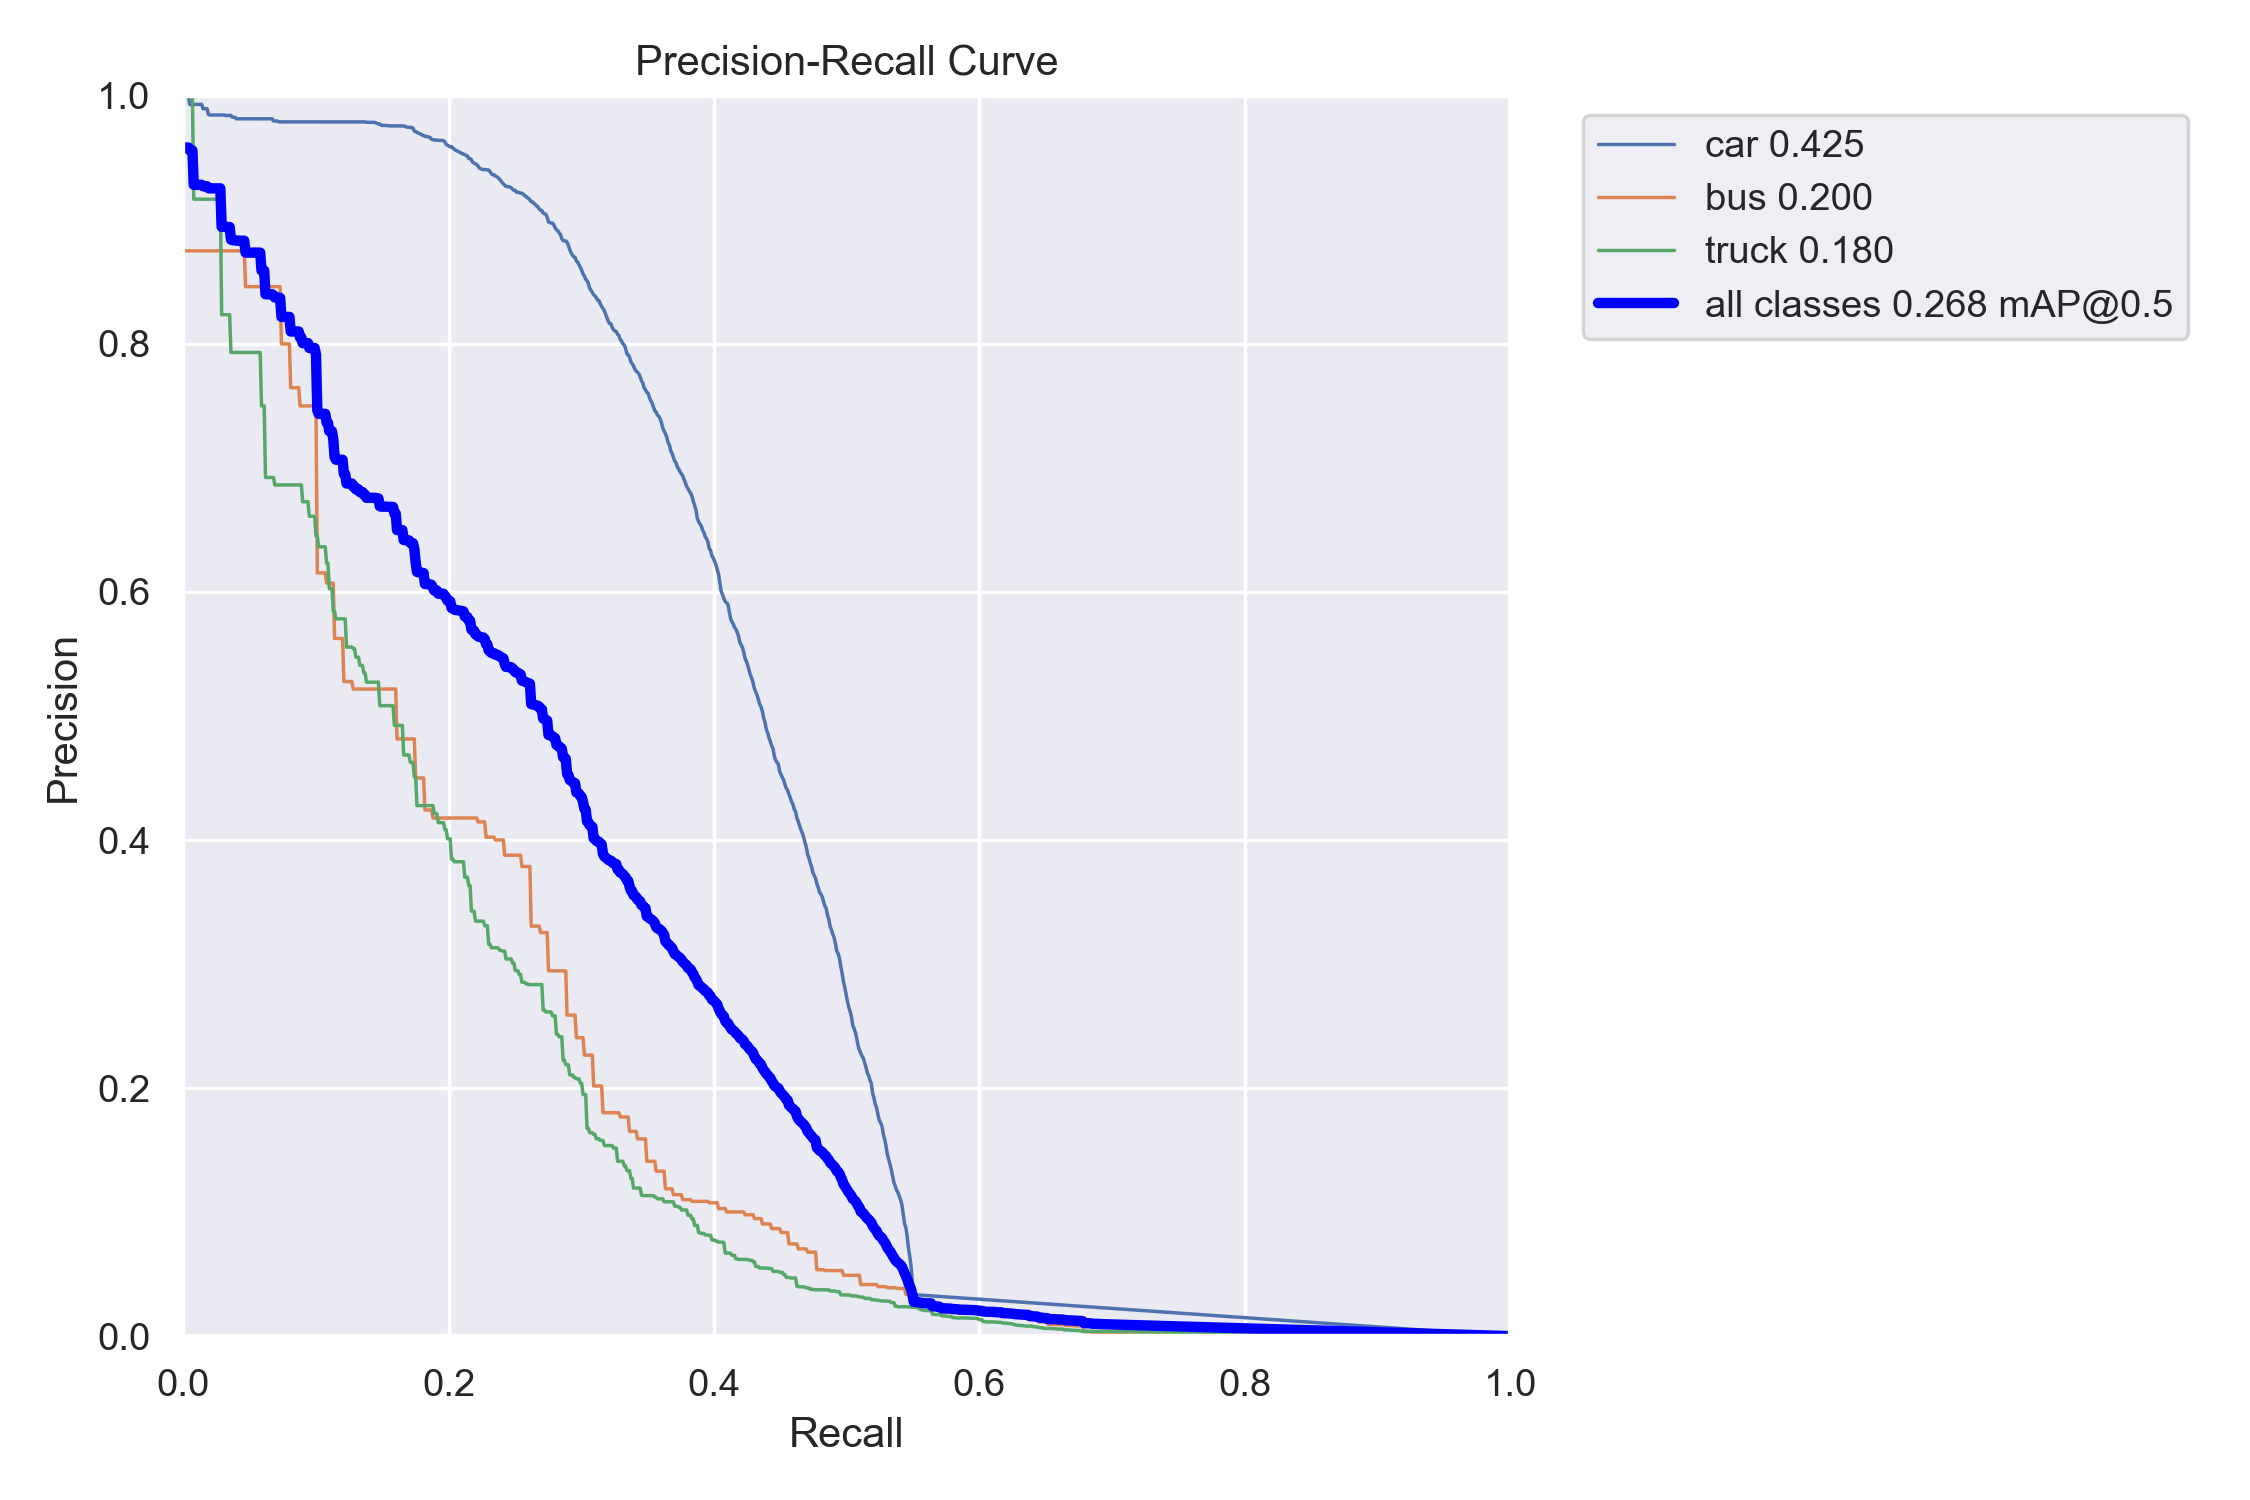

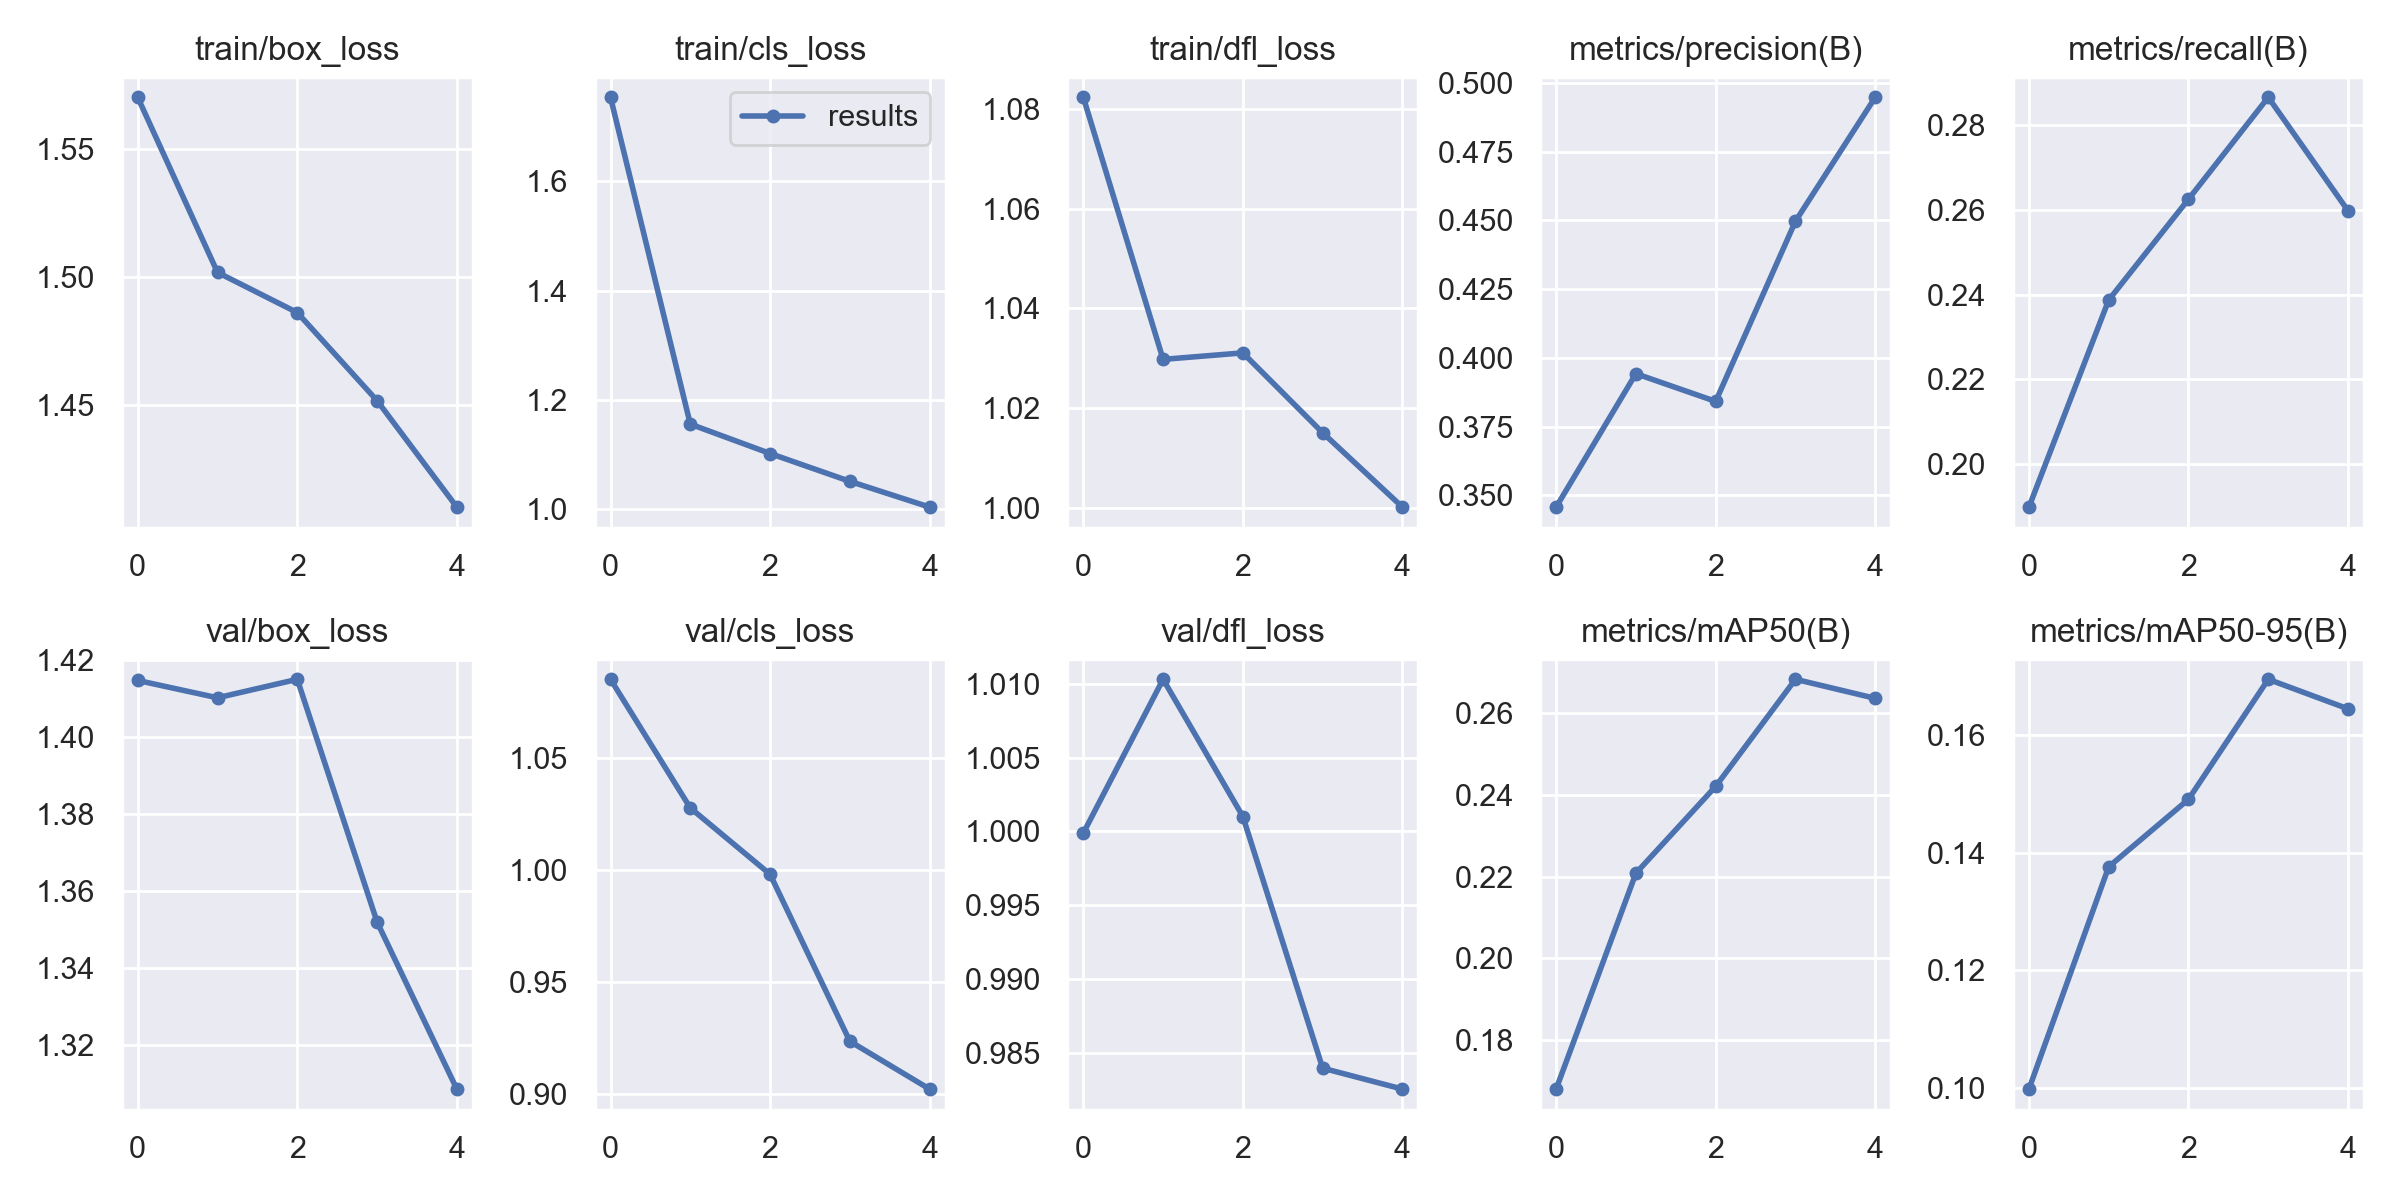

**val_batch0_labels**
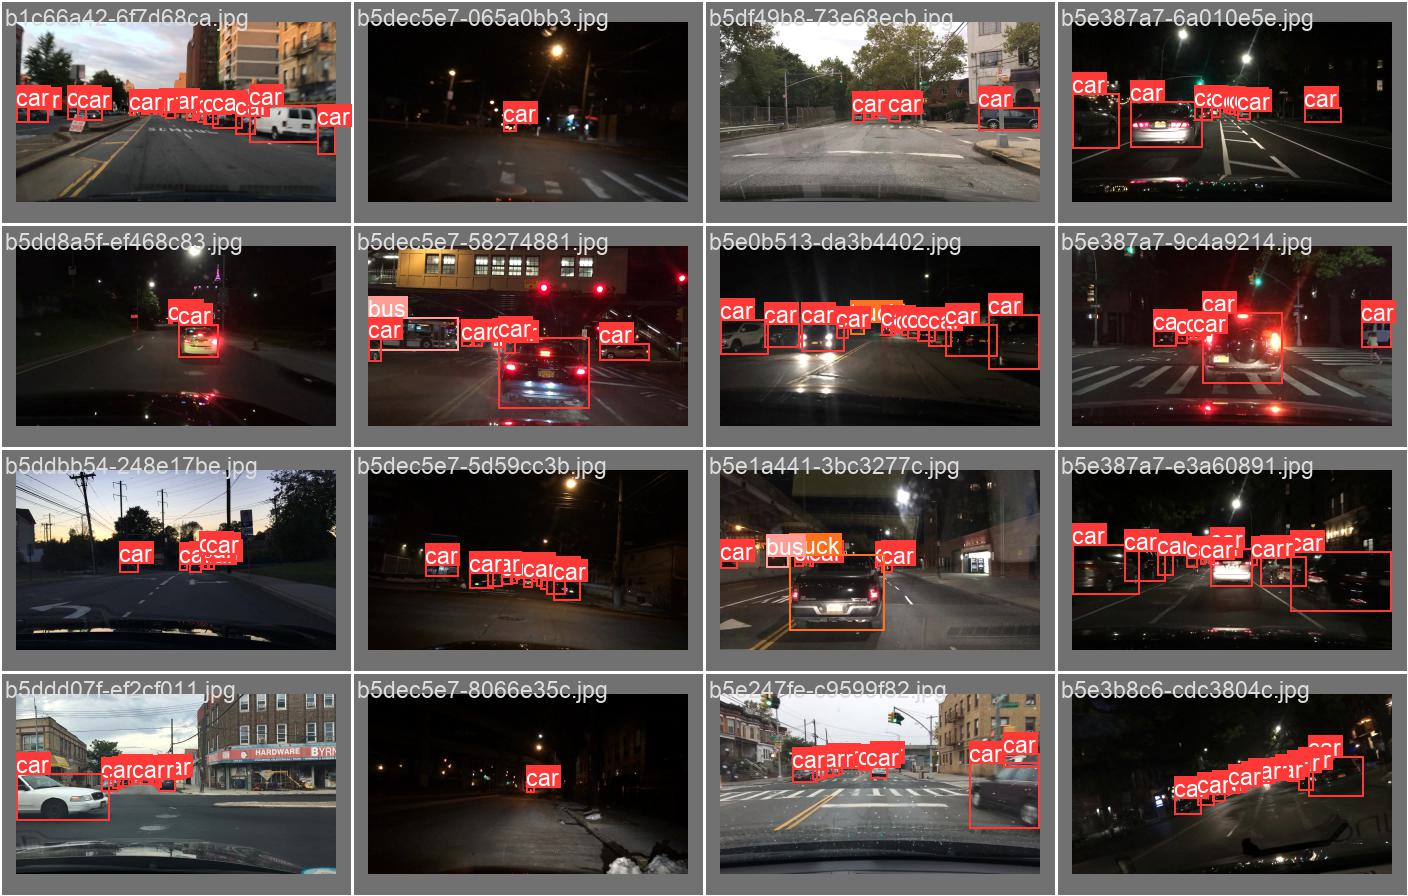

**val_batch0_pred**
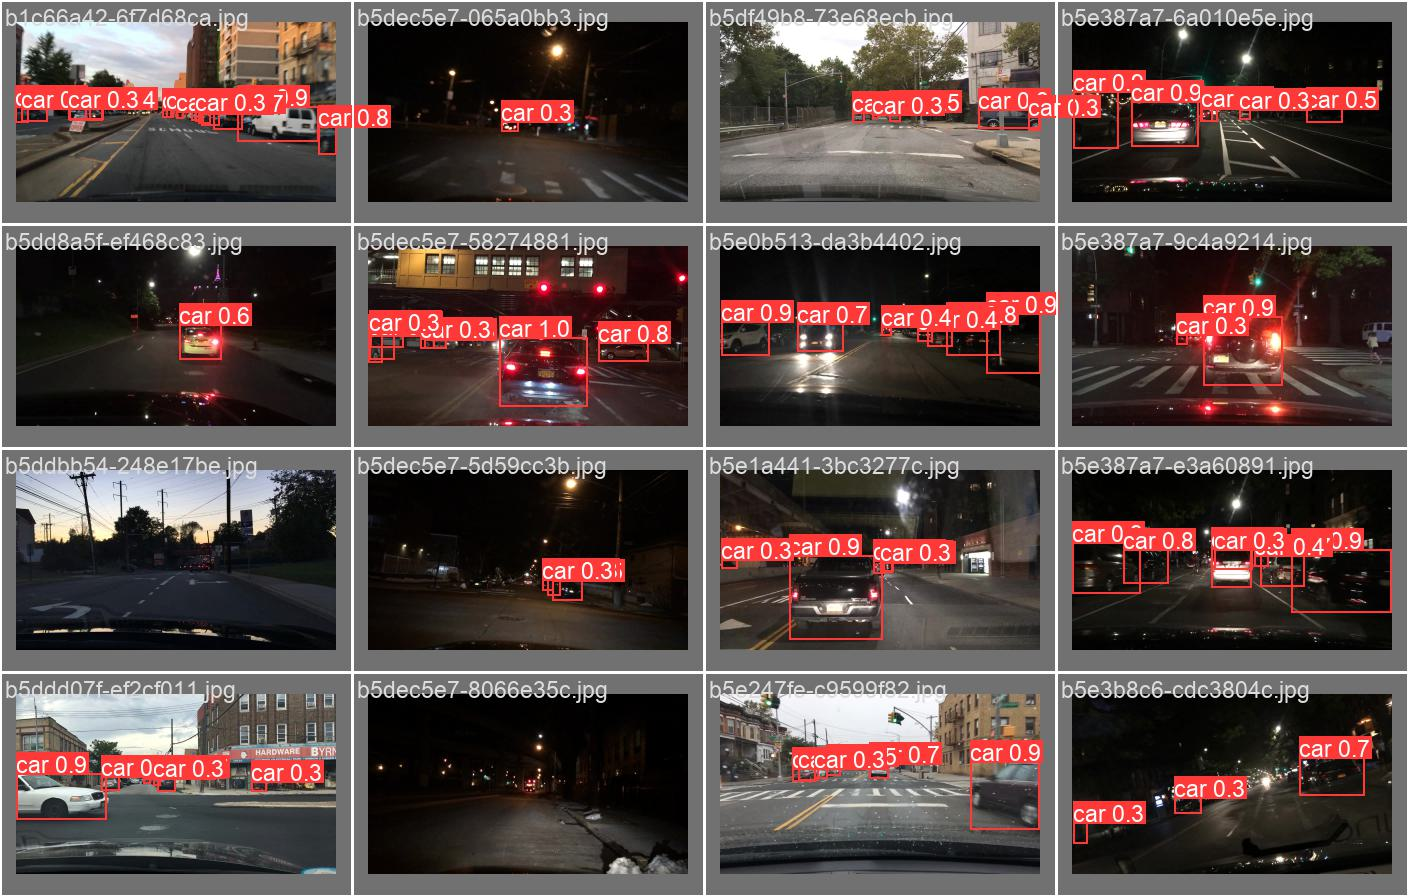

**val_batch1_labels**
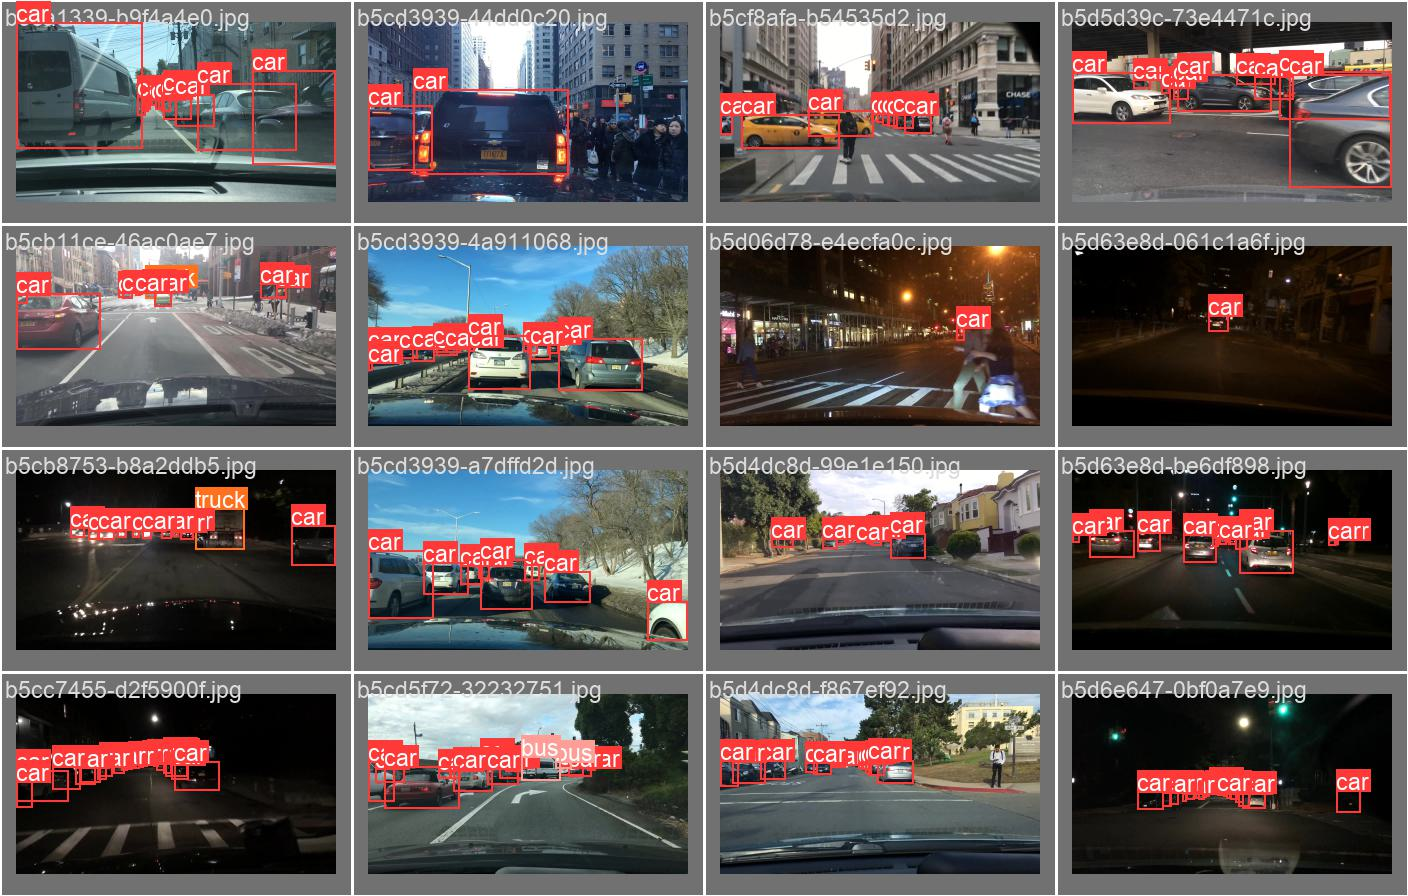

**val_batch1_pred**
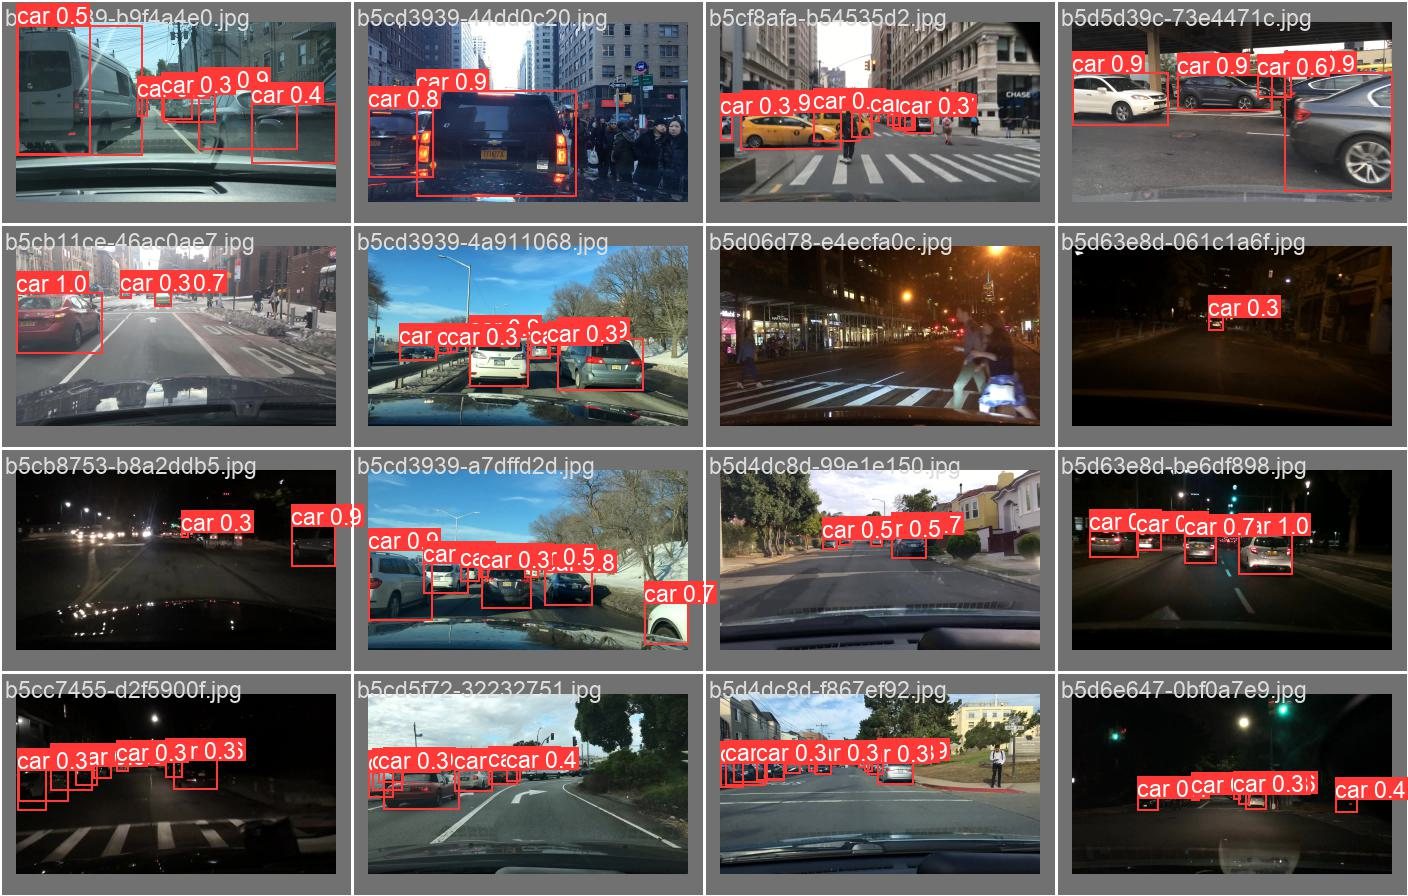

**val_batch2_labels**
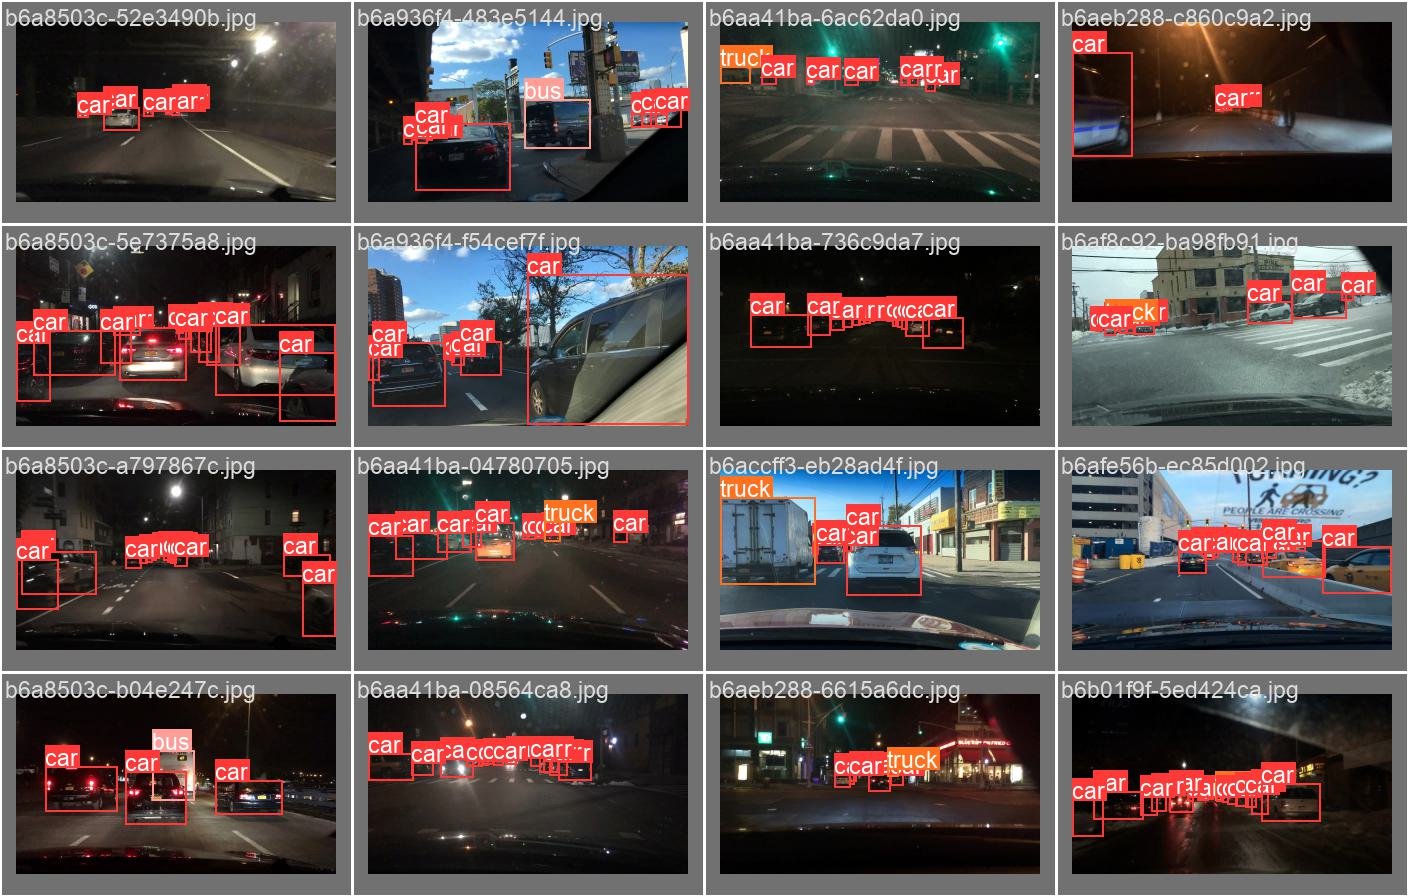

**val_batch2_pred**
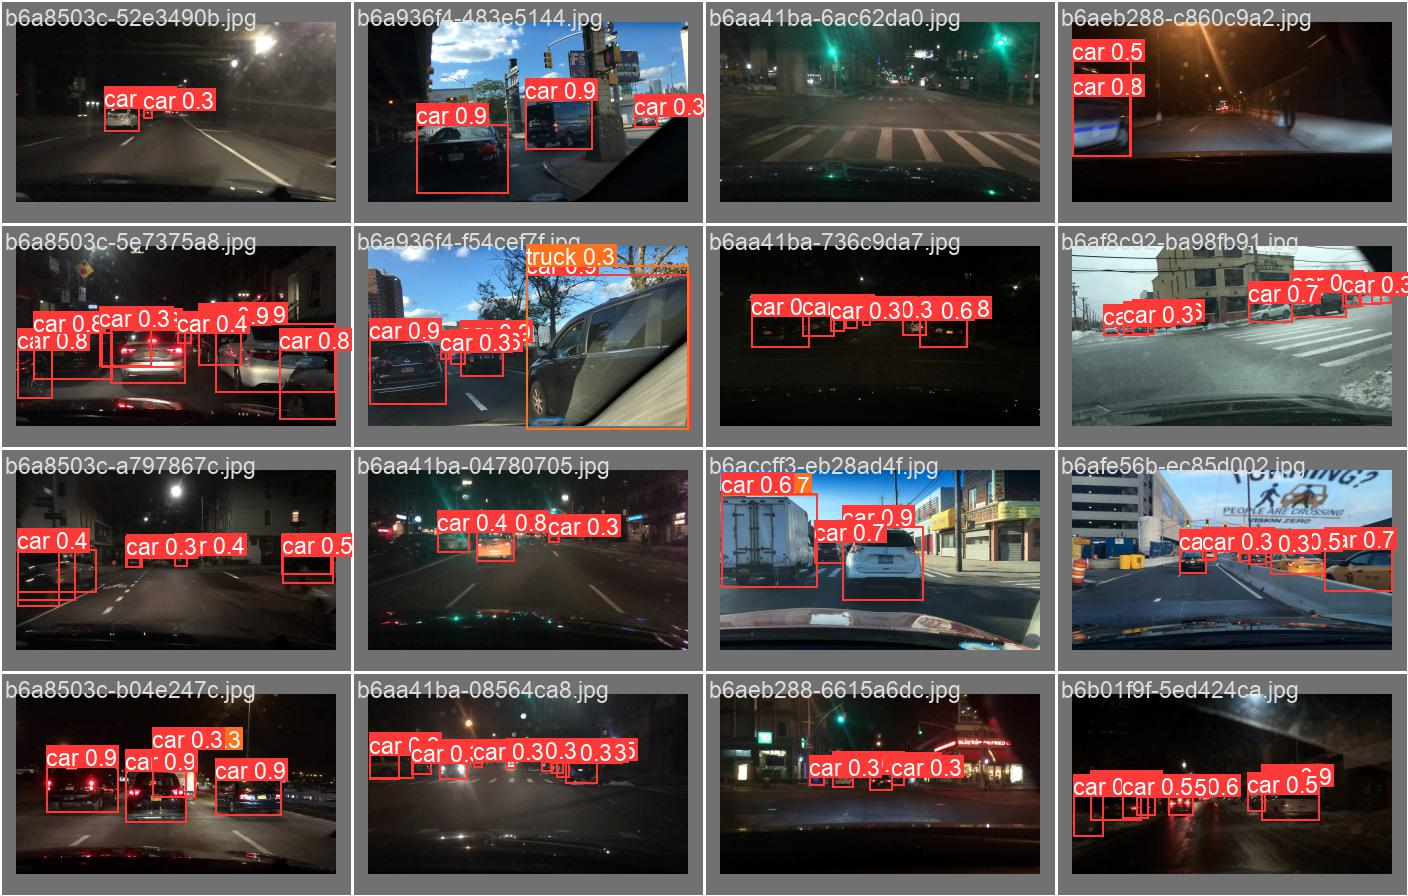